# Importing libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import os
from astropy.modeling import models
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.timeseries import LombScargle
import astropy.time as at
from scipy.special import voigt_profile
import Analysis_functions as AF
from importlib import reload
import itertools
import scipy.odr as so
import scipy.stats as ss
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.colors as mc
import emcee
from matplotlib.ticker import FormatStrFormatter
import corner

# Defining Useful variables

In [2]:
days = ['2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', 
        '2023-01-25', '2023-01-26', '2023-01-27', '2023-02-01', '2023-02-02', '2023-02-03',
        '2023-02-06', '2023-02-15', '2023-02-16']
new = True

blaze_dir = 'Blaze-data'
dir_name = 'Corr-data'
CCF_dir_name = 'CCF_RV-data'
telluric_dir_name = 'Telluric-data'
HARPS_directory = '/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/new_Solar-data/'
#Time dictionnary 
time_dict = {}

#He triplet dictionnary
fit_params_dict = {}
fit_err_dict = {}

#H2O line dictionnary
fit_params_T_dict = {}
fit_err_T_dict = {}

#Si line dictionnary
fit_params_Si_dict = {}
fit_err_Si_dict = {}


# Extracting, reducing the data
# Fitting line + plotting periodogram (He triplet + Si line + Water line)

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


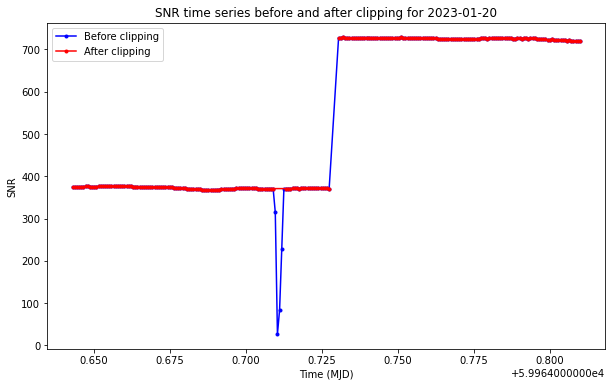

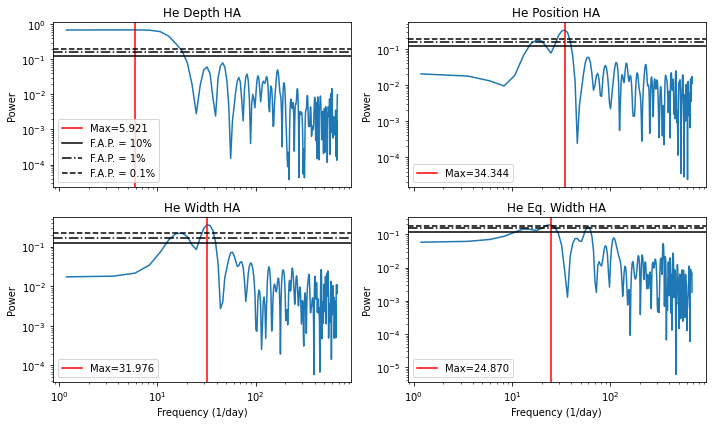

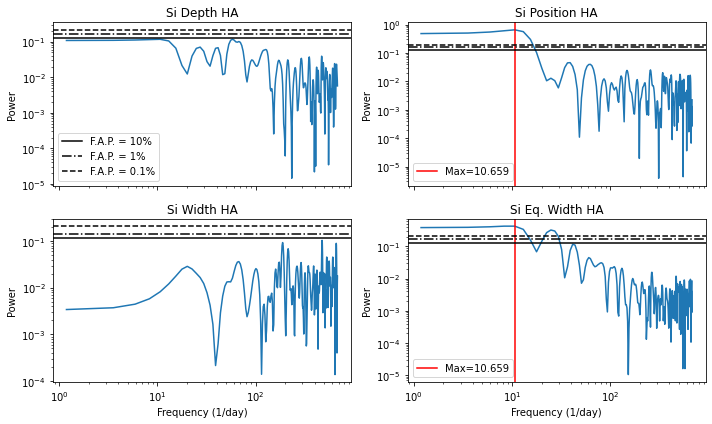

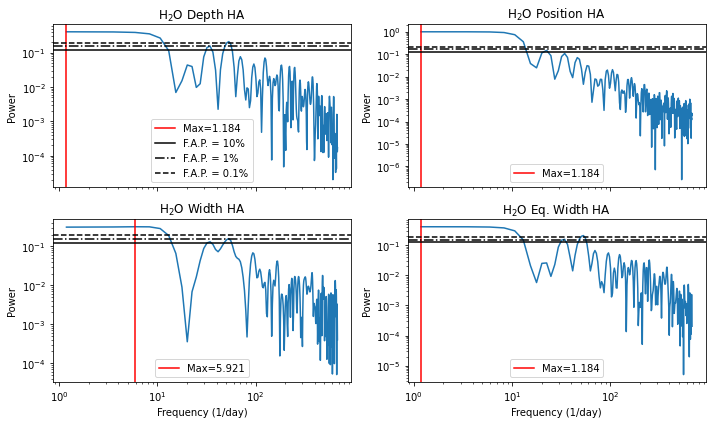

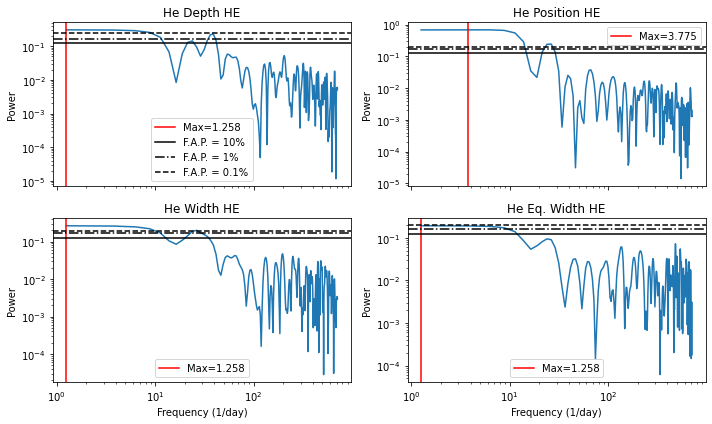

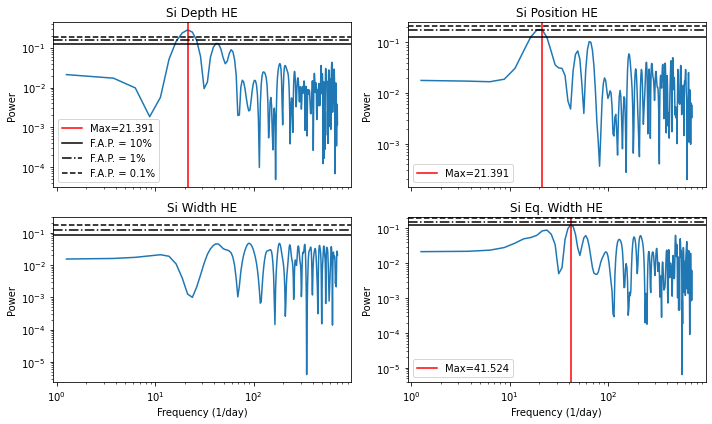

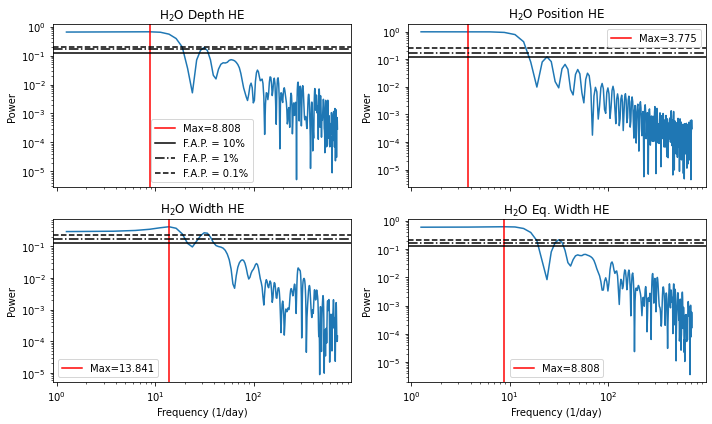

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


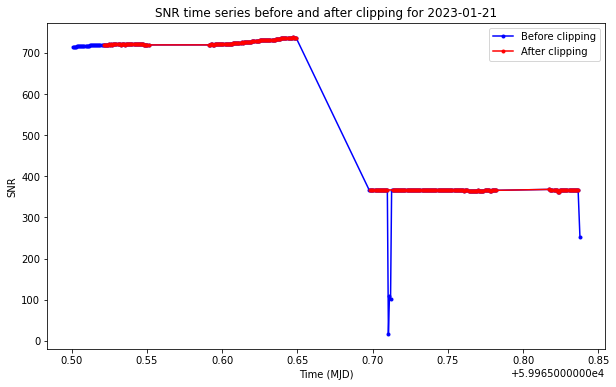

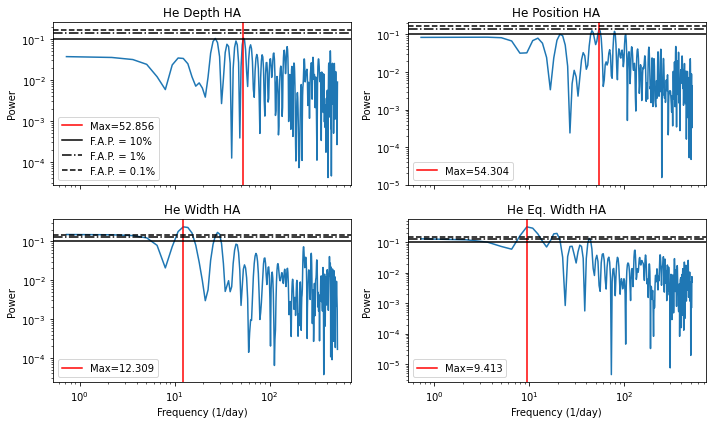

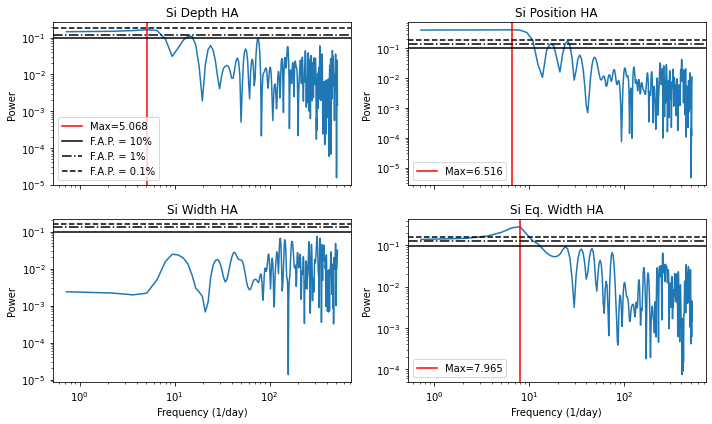

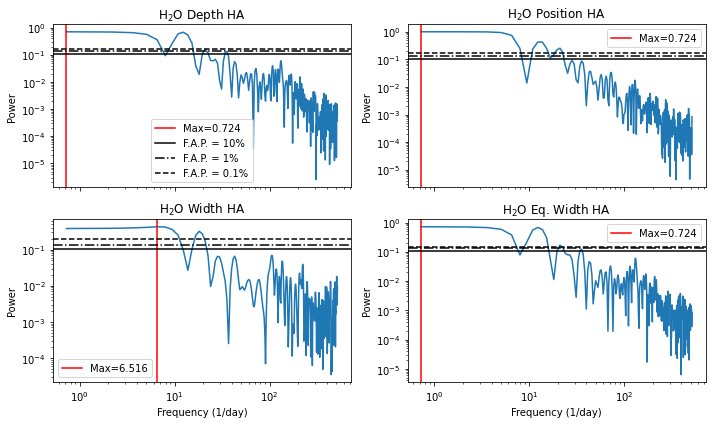

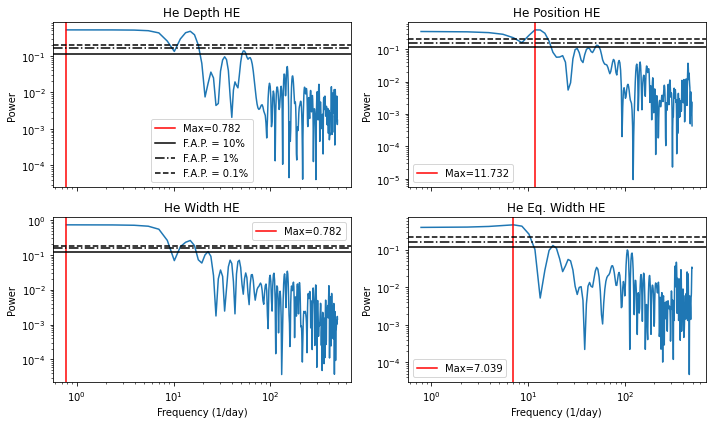

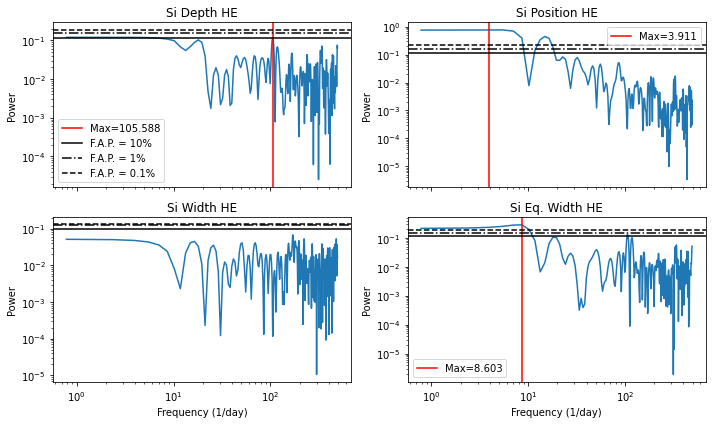

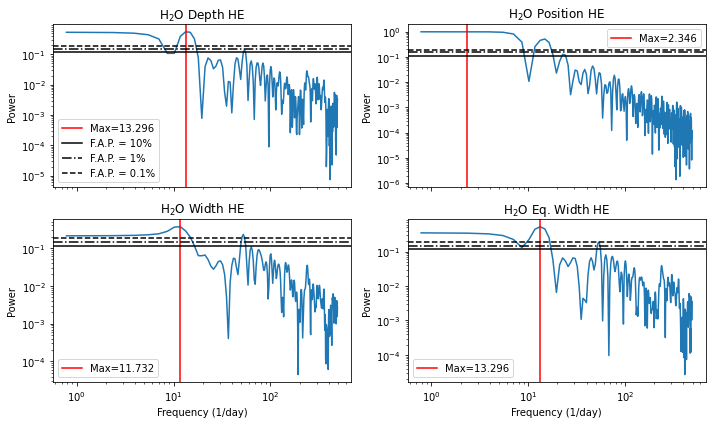

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


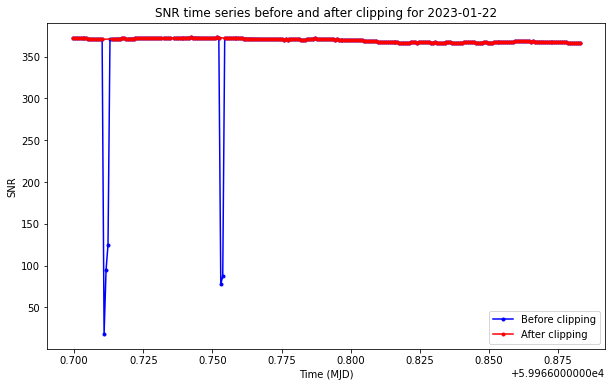

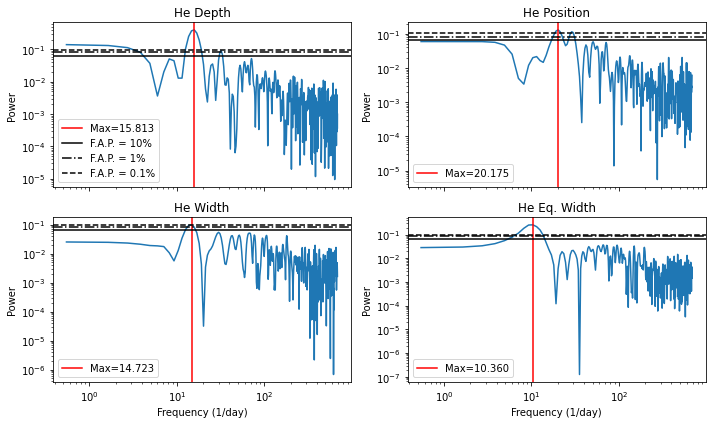

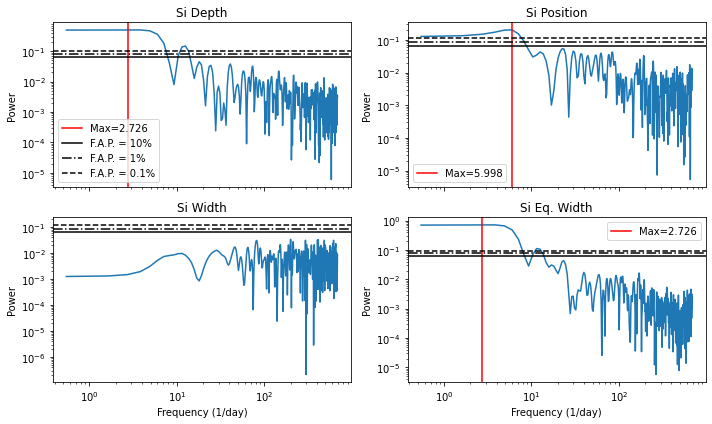

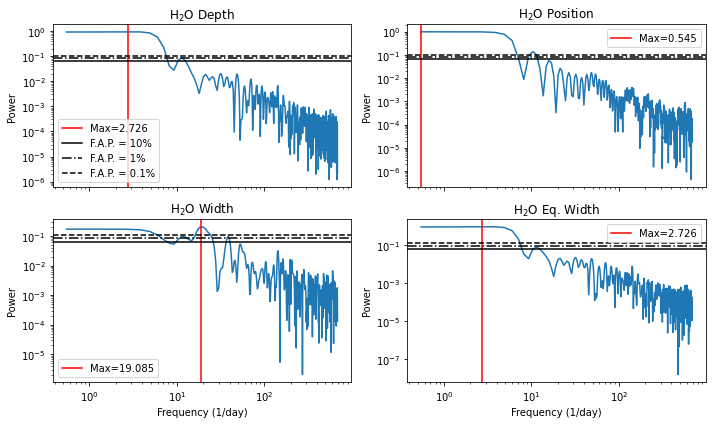

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


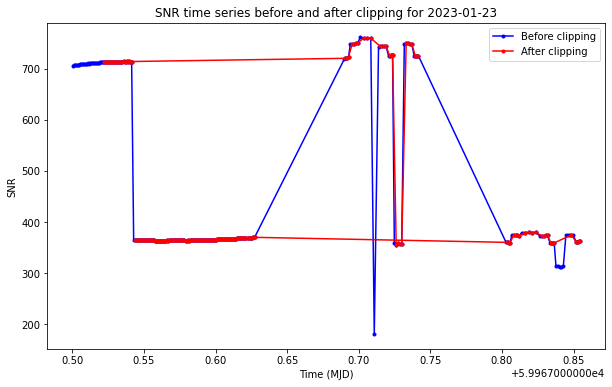

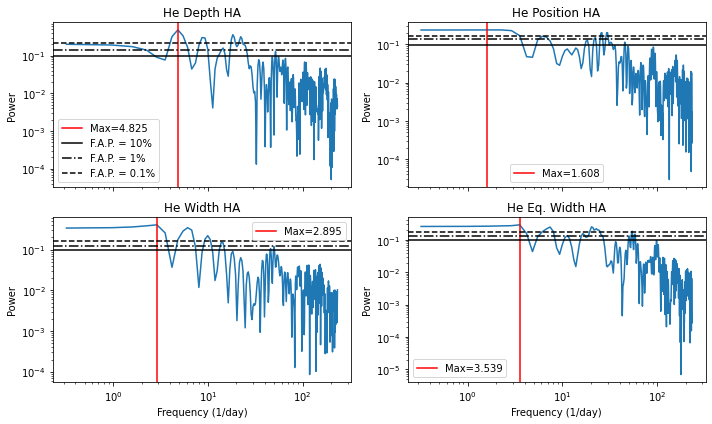

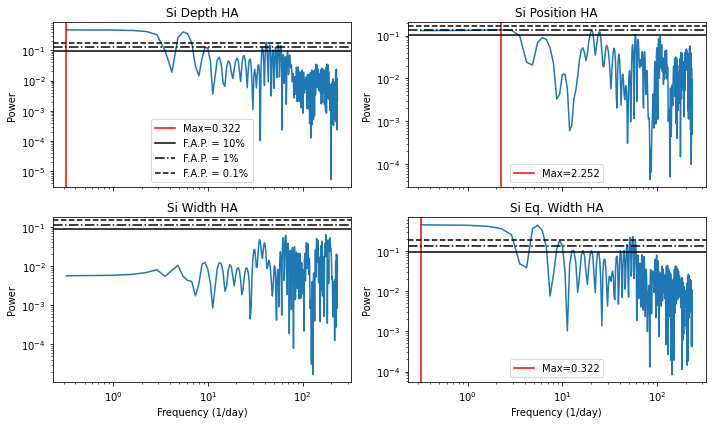

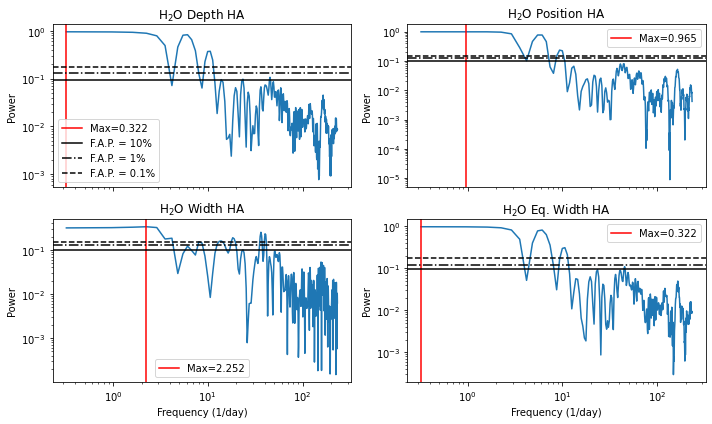

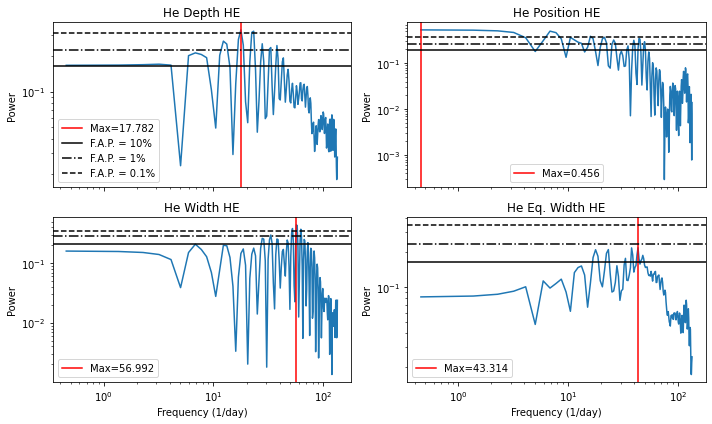

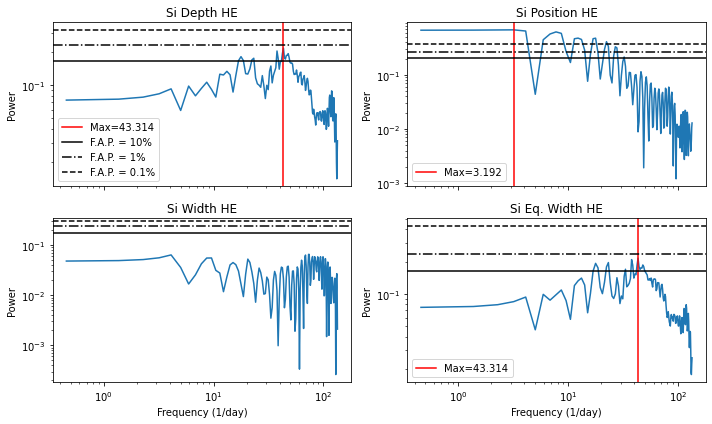

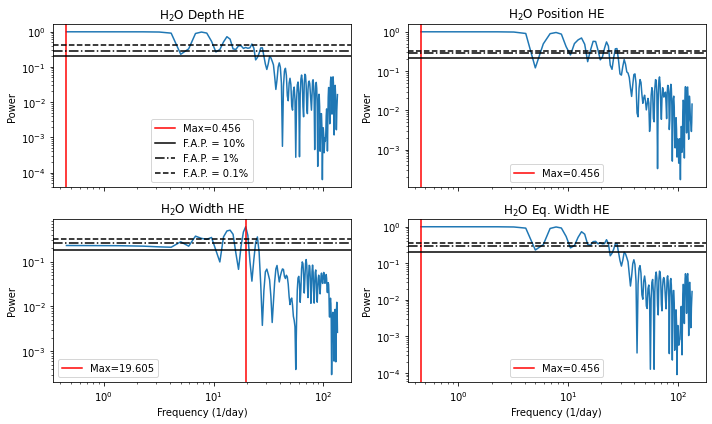

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


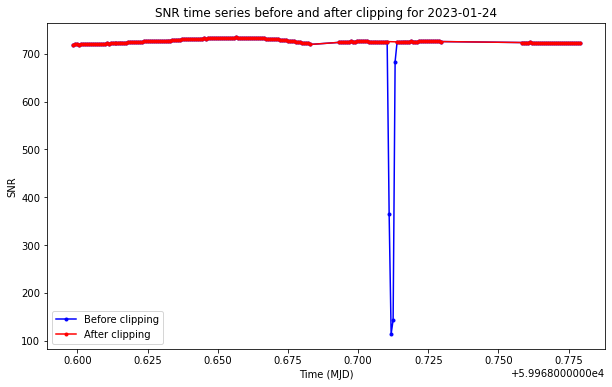

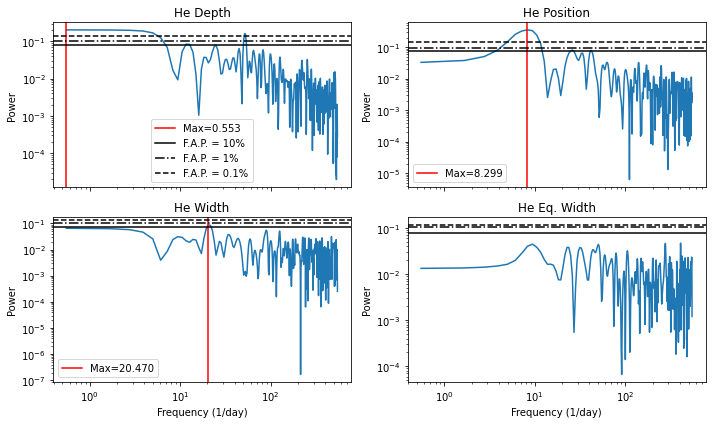

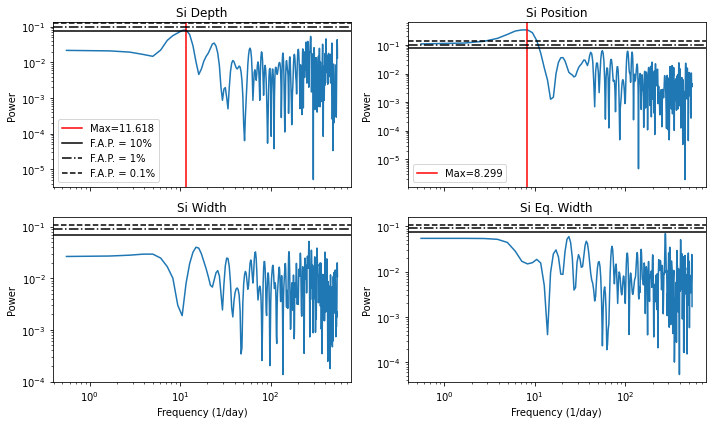

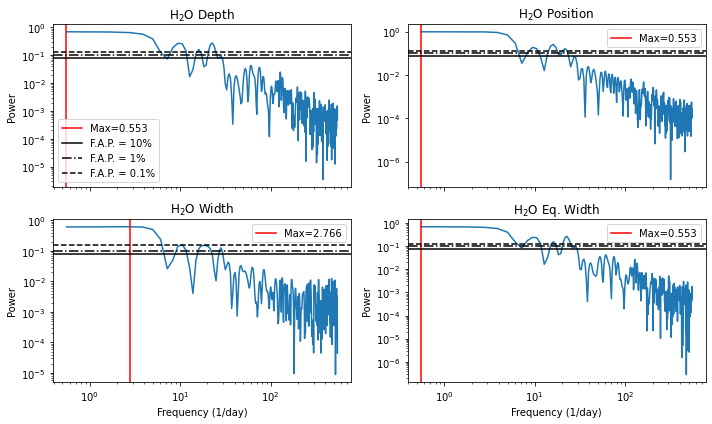

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


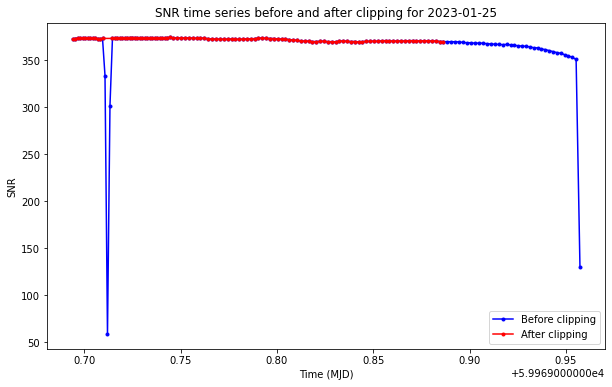

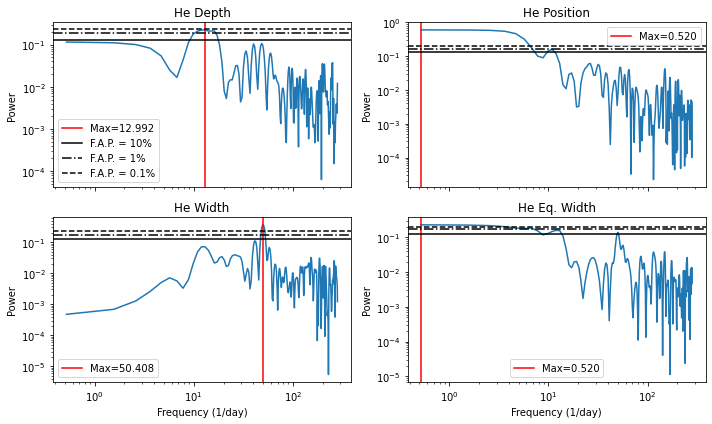

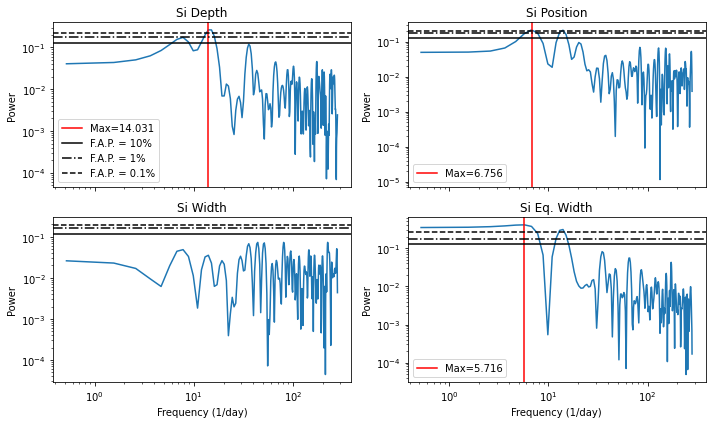

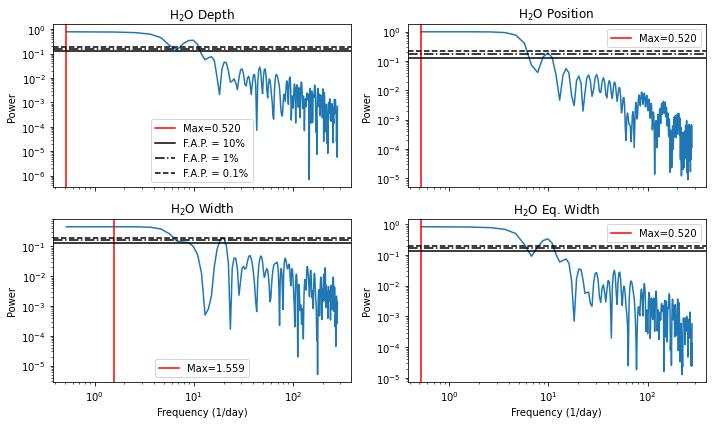

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


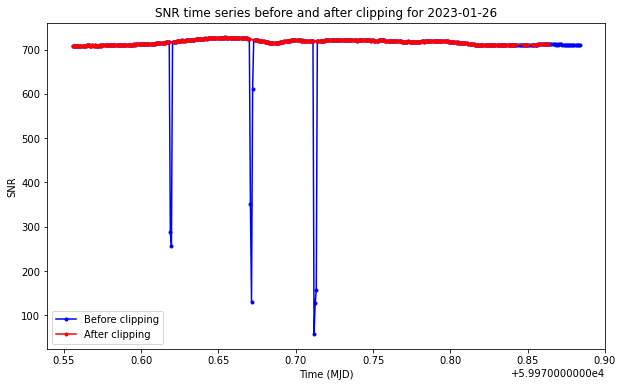

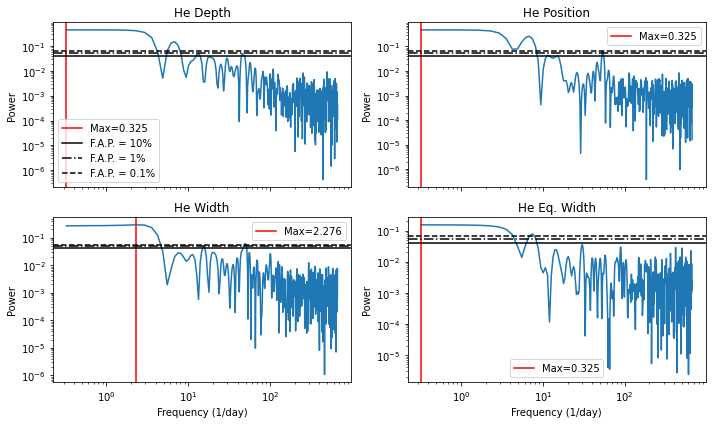

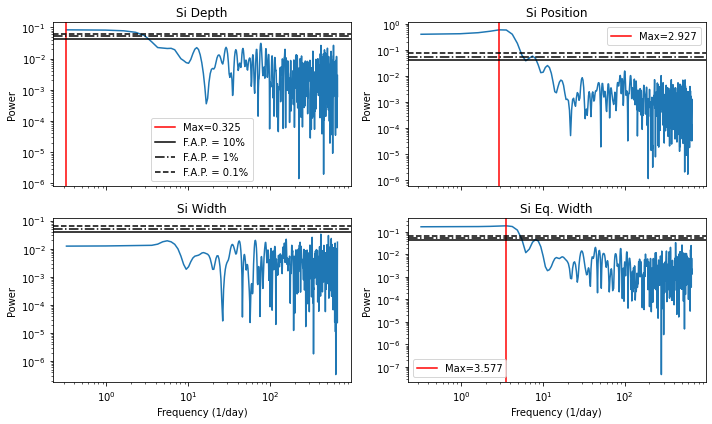

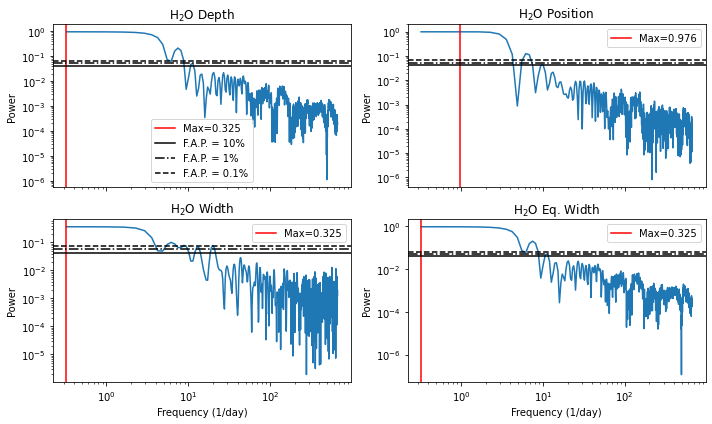

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


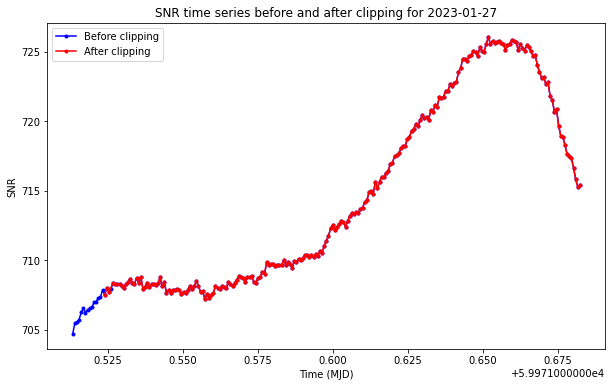

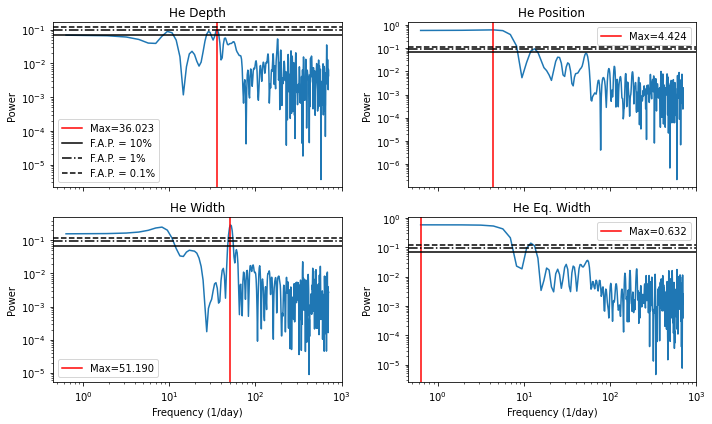

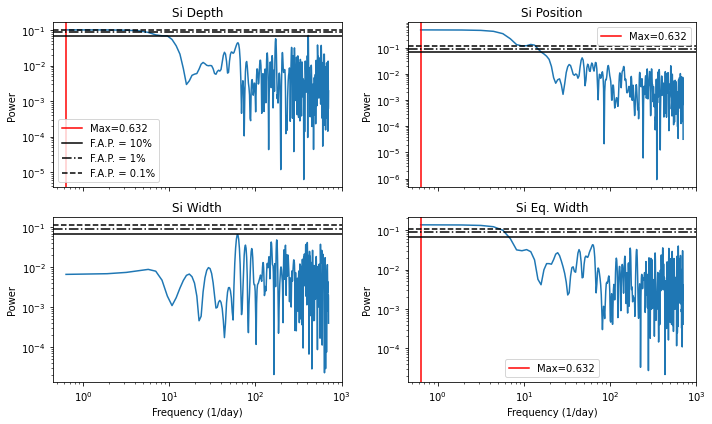

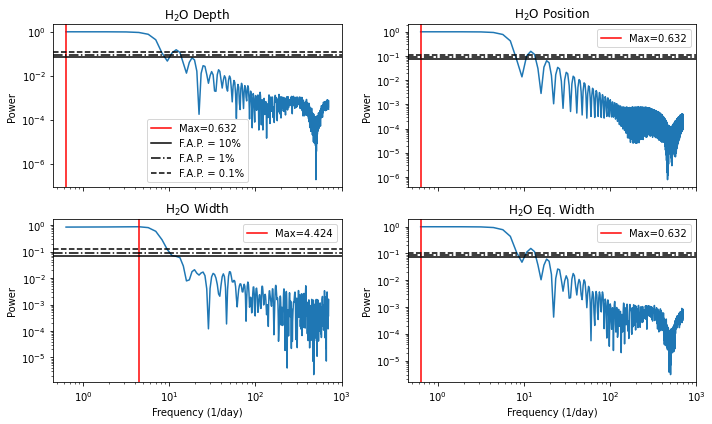

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


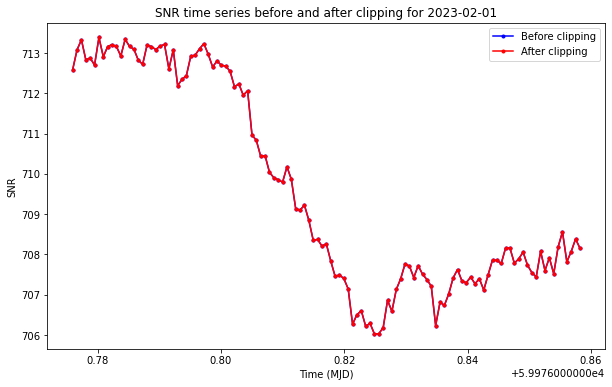

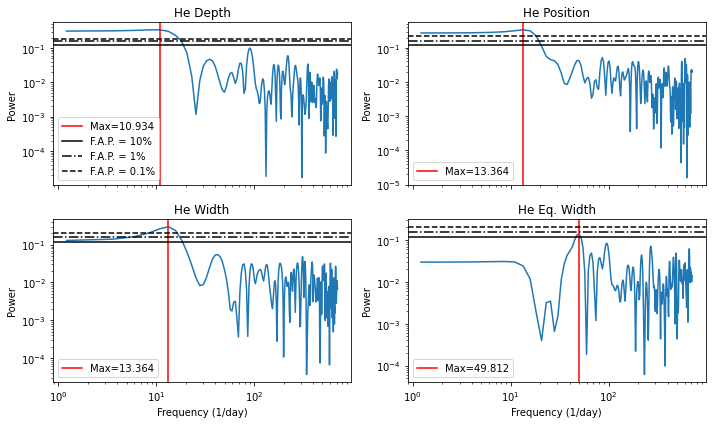

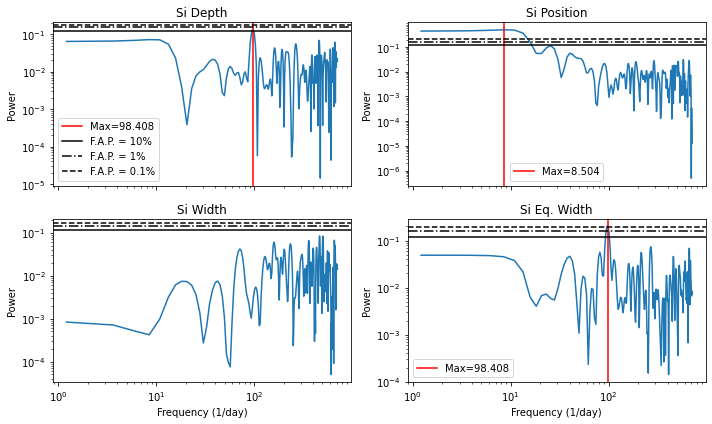

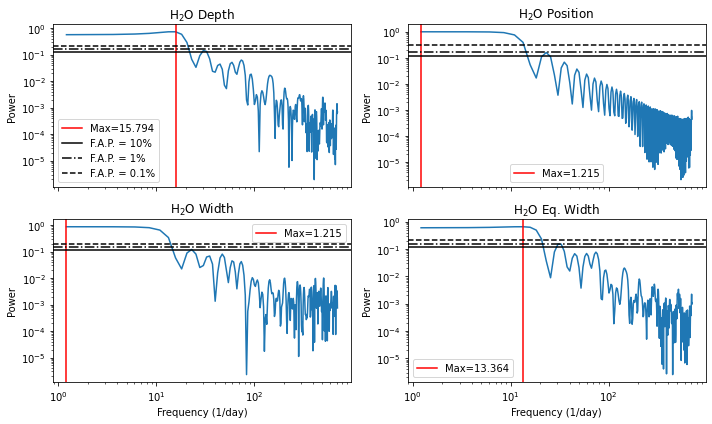

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


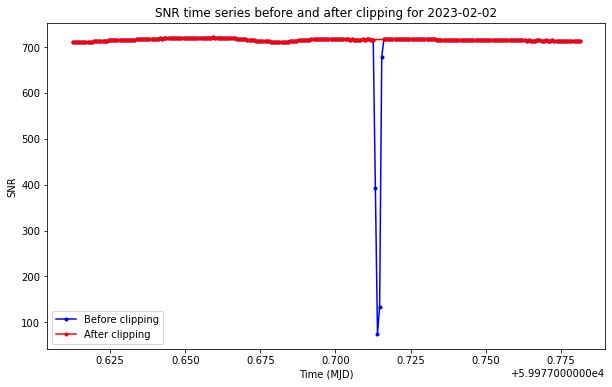

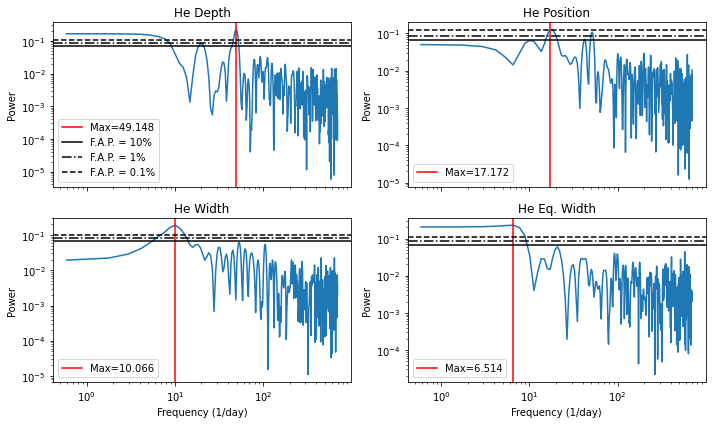

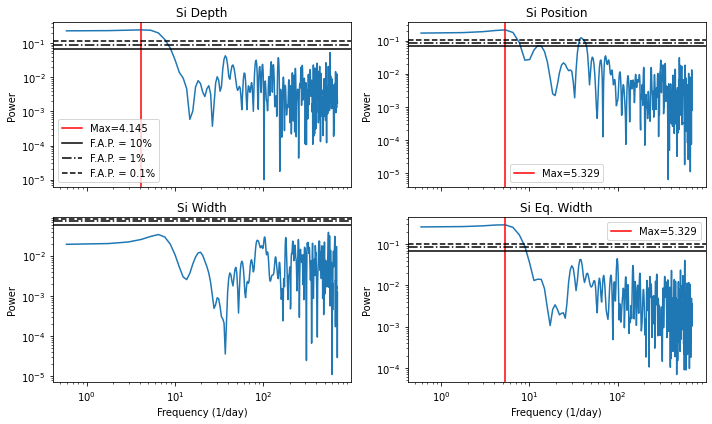

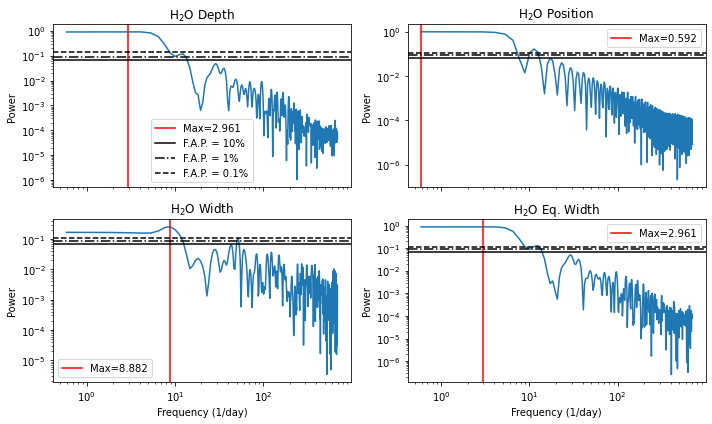

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


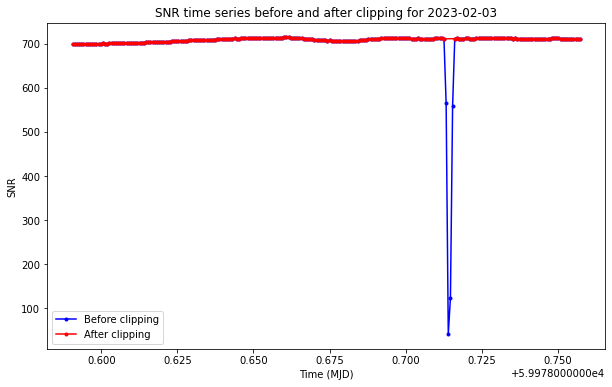

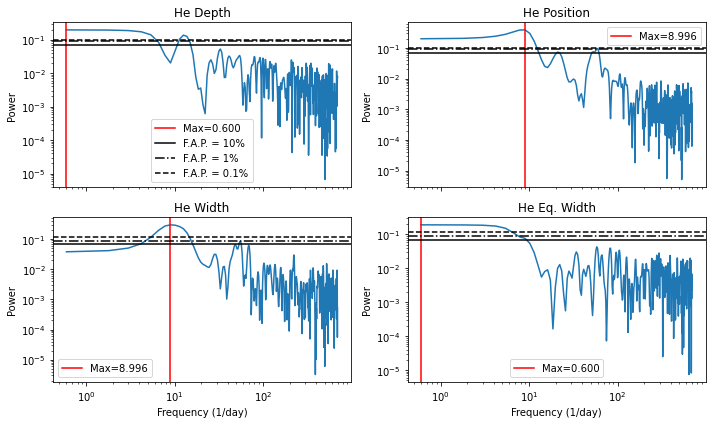

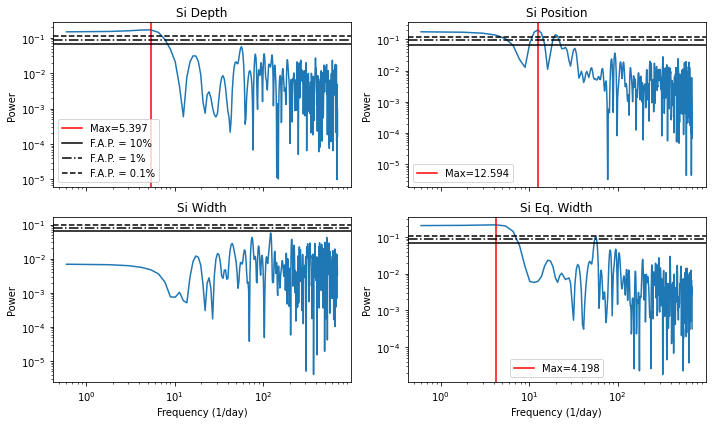

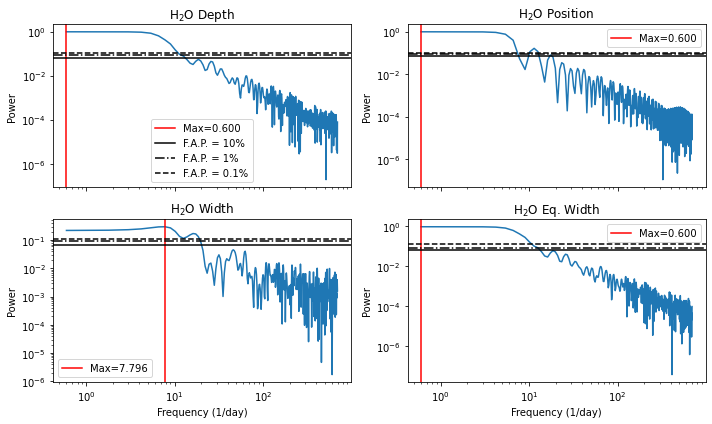

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


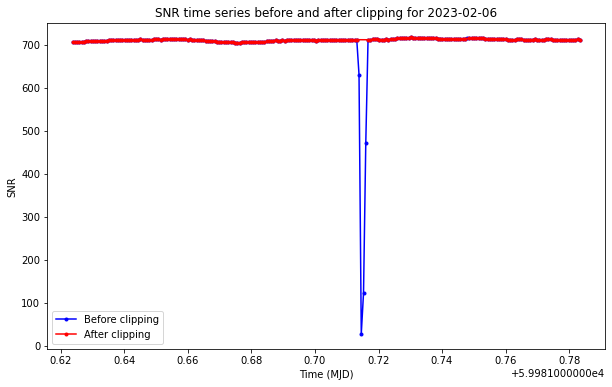

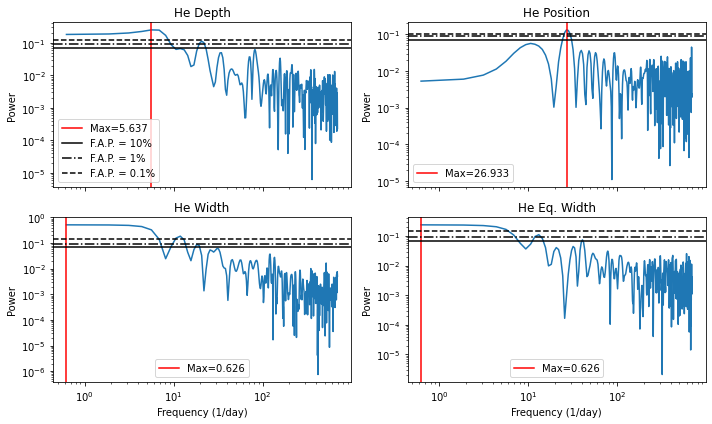

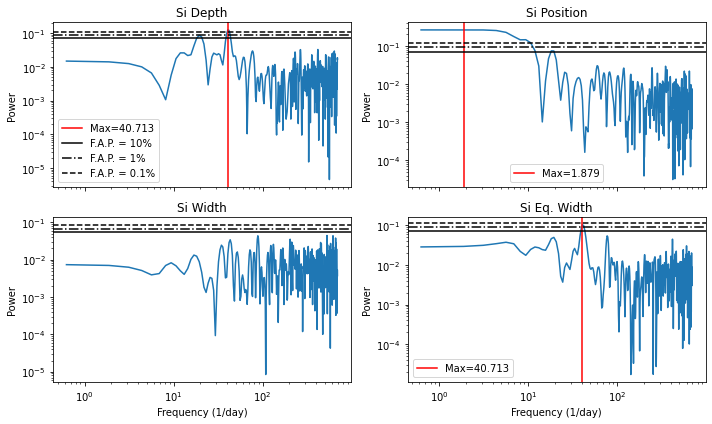

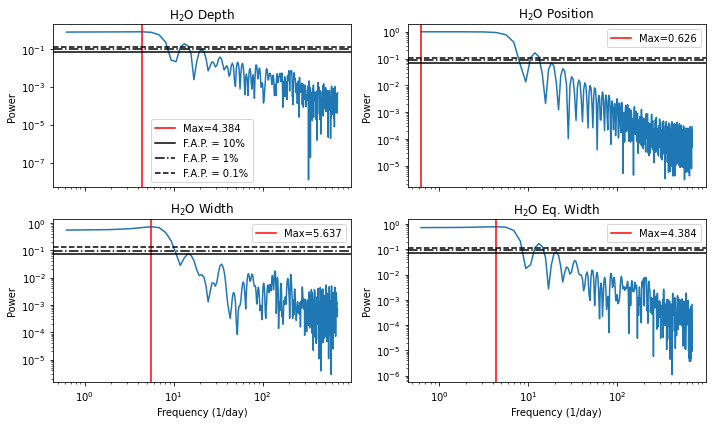

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


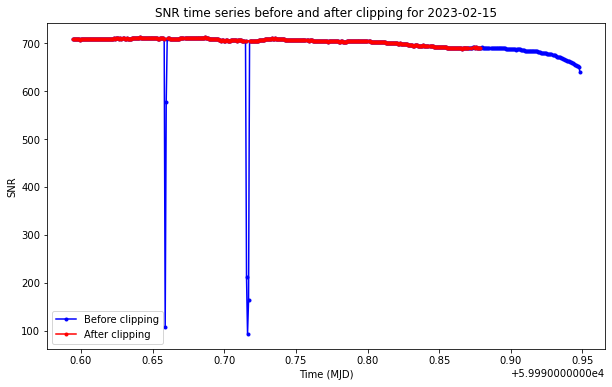

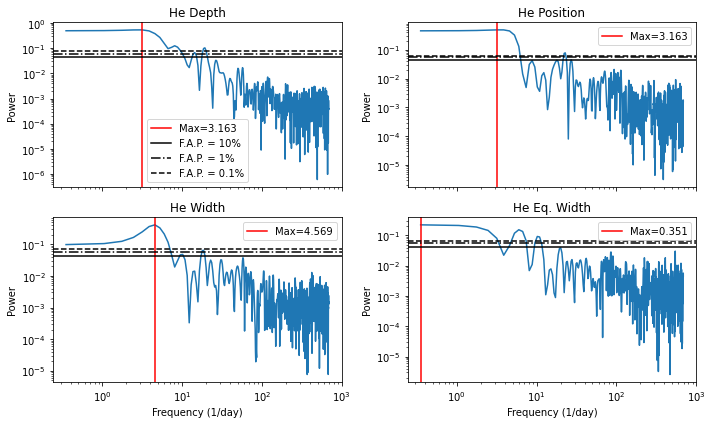

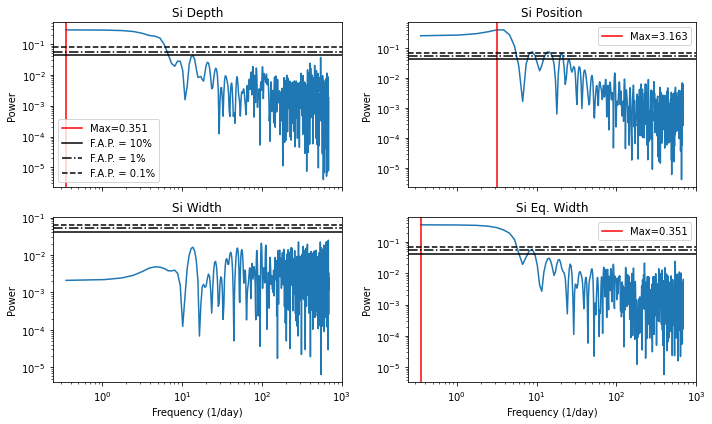

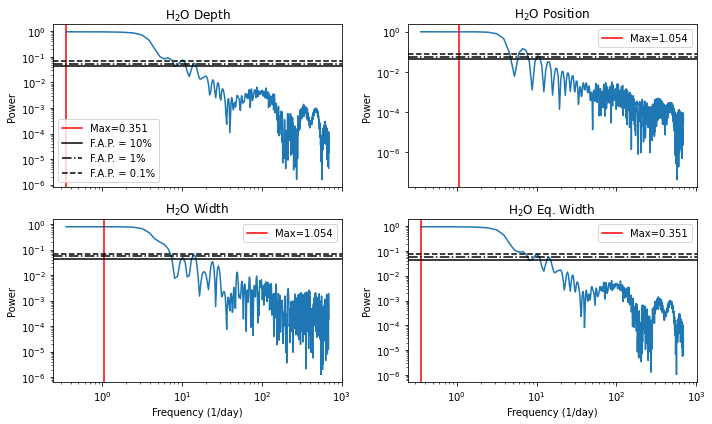

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:488: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


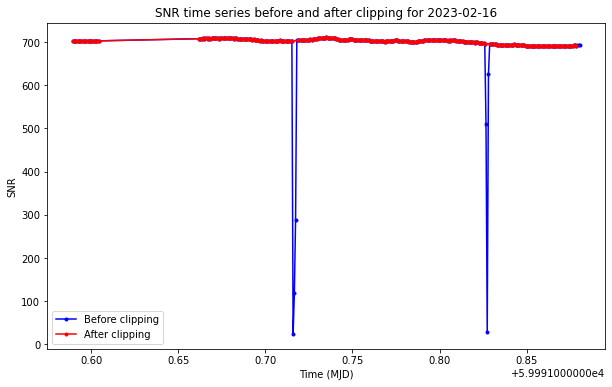

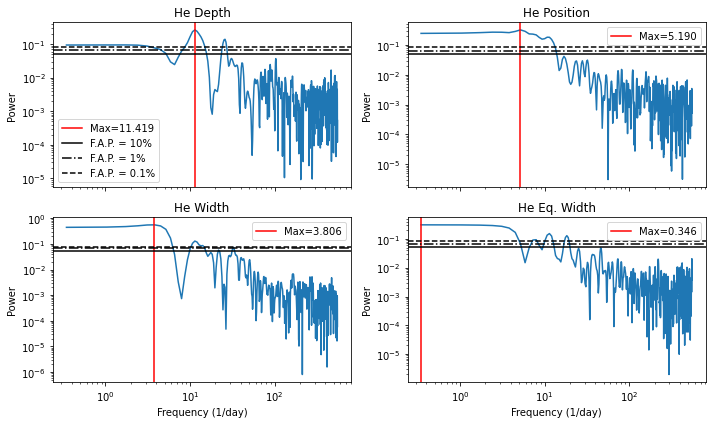

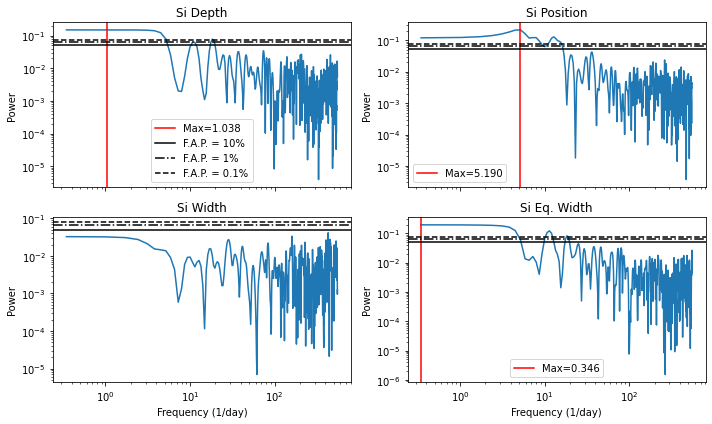

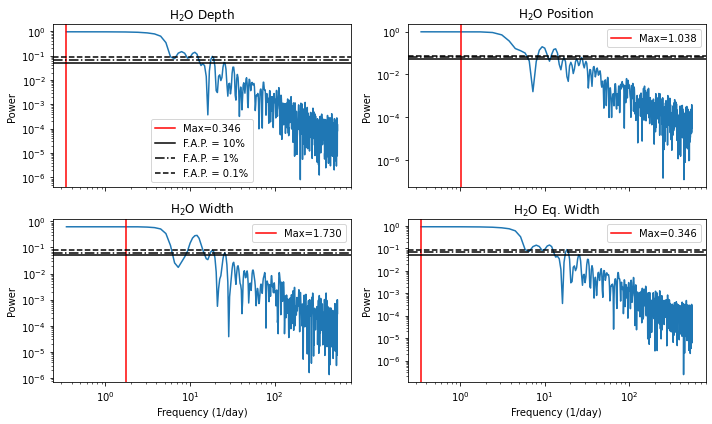

In [7]:
reload(AF)

for day in days:
    
    #Defining the location
    location = '/Users/samsonmercier/Desktop/UNIGE/Winter_Semester_2022-2023/APLII/new_Solar-data/'+day
    os.chdir(location)
    if not os.path.exists('Plot_Results'):
        os.mkdir('Plot_Results')
    
    #Extracting the data
    if new:
        #tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_FWHM_err, tot_BIS_SPAN, tot_BIS_SPAN_err, tot_CONTRAST, tot_CONTRAST_err, tot_H2O, tot_H2O_err, tot_O2, tot_O2_err, tot_CO2, tot_CO2_err, tot_AIRM, tot_telluric 
        long_dataset = AF.new_extraction(dir_name, blaze_dir, CCF_dir_name, telluric_dir_name, 14)

    else:
        #tot_lamda, tot_spctr, tot_norm_spctr, tot_err, tot_norm_err, tot_SNR, tot_mode, tot_date, tot_RV, tot_RV_err, tot_FWHM, tot_FWHM_err, tot_BIS_SPAN, tot_BIS_SPAN_err, tot_CONTRAST, tot_CONTRAST_err, tot_H2O, tot_H2O_err, tot_O2, tot_O2_err, tot_CO2, tot_CO2_err, tot_AIRM 
        long_dataset = AF.extraction(dir_name, blaze_dir, CCF_dir_name, 14)
    
    #For data reduction and plotting
    tot_SNR = long_dataset[5]
    tot_mode = long_dataset[6]
    tot_date = long_dataset[7]
    tot_RV = long_dataset[8]
    tot_AIRM = long_dataset[-2]
    sig = 200
    
    #For fitting the He triplet
    lower_lim_He = 10831.5
    upper_lim_He = 10834.1
    guess_params_He = [-0.06, -100, 10833.3, 0.1, 0.008]
    bounds_param_He = ((-np.inf, -np.inf, 10833.2, -np.inf, -np.inf),(0, np.inf, 10833.4, np.inf, np.inf)) 

    #For fitting the Si line
    lower_lim_Si = 10828
    upper_lim_Si = 10832
    guess_params_Si = [0.3, 0.6, 10830, 0.1, 0.2]
    bounds_param_Si = ((-np.inf, -np.inf, -np.inf, -np.inf, -np.inf), (np.inf, np.inf, np.inf, np.inf, np.inf))

    #For fitting the water line
    lower_lim_T = 10832.5
    upper_lim_T = 10834.1
    guess_params_T = [-0.04, 0.05, 10833.3, 0.1, 0.01]
    bounds_param_T = ((-np.inf, -np.inf, 10832.9, 0.01, -np.inf), (0, np.inf, 10833.5, np.inf, np.inf))

    #For plotting the False alarm probability
    probas = [0.1, 0.01, 0.001]

    #Distinguish two cases depending on the number of modes of observation
    
#####################################################################################################################
#####################################################################################################################
##########If there are two modes of observation######################################################################
#####################################################################################################################
#####################################################################################################################
    if np.sum(tot_mode=='A') != len(tot_mode) and np.sum(tot_mode=='E')!= len(tot_mode):
        total_lamda_HA, total_lamda_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[0], tot_RV, tot_AIRM, sig)

        total_spctr_HA, total_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[1], tot_RV, tot_AIRM, sig)

        total_norm_spctr_HA, total_norm_spctr_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[2], tot_RV, tot_AIRM, sig)

        total_err_HA, total_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[3], tot_RV, tot_AIRM, sig)

        total_norm_err_HA, total_norm_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[4], tot_RV, tot_AIRM, sig)
        
        total_SNR_HA, total_SNR_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[5], tot_RV, tot_AIRM, sig)

        date_HA, date_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[7], tot_RV, tot_AIRM, sig)

        total_RV_HA, total_RV_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[8], tot_RV, tot_AIRM, sig)

        total_RV_err_HA, total_RV_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[9], tot_RV, tot_AIRM, sig)

        total_FWHM_HA, total_FWHM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[10], tot_RV, tot_AIRM, sig)

        total_FWHM_err_HA, total_FWHM_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[11], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_HA, total_BIS_SPAN_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[12], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_err_HA, total_BIS_SPAN_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[13], tot_RV, tot_AIRM, sig)

        total_CONTRAST_HA, total_CONTRAST_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[14], tot_RV, tot_AIRM, sig)

        total_CONTRAST_err_HA, total_CONTRAST_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[15], tot_RV, tot_AIRM, sig)

        total_H2O_HA, total_H2O_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[16], tot_RV, tot_AIRM, sig)

        total_H2O_err_HA, total_H2O_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[17], tot_RV, tot_AIRM, sig)

        total_O2_HA, total_O2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[18], tot_RV, tot_AIRM, sig)

        total_O2_err_HA, total_O2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[19], tot_RV, tot_AIRM, sig)

        total_CO2_HA, total_CO2_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[20], tot_RV, tot_AIRM, sig)

        total_CO2_err_HA, total_CO2_err_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[21], tot_RV, tot_AIRM, sig)

        total_AIRM_HA, total_AIRM_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[22], tot_RV, tot_AIRM, sig)

        total_telluric_HA, total_telluric_HE = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[23], tot_RV, tot_AIRM, sig)

        #Plotting the SNR time series to make sure the outliers have been removed
        plt.figure(figsize=[10, 6])
        plt.plot(tot_date, tot_SNR, 'b.', linestyle='-', label='Before clipping')
        plt.plot(date_HA, total_SNR_HA, 'r.', linestyle='-', label='After clipping')
        plt.plot(date_HE, total_SNR_HE, 'r.', linestyle='-')
        plt.xlabel('Time (MJD)')
        plt.ylabel('SNR')
        plt.title('SNR time series before and after clipping for '+day)
        plt.legend()

##################################################################################################################
#########Fitting the He triplet - HA #############################################################################
##################################################################################################################
        theta_HA, err_theta_HA = AF.fit_spctr_line(AF.gaussian_L, lower_lim_He, upper_lim_He, guess_params_He, 
                                               bounds_param_He, total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r', False)

        LS_depth_HA = LombScargle(date_HA, theta_HA[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HA, theta_HA[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_position_HA = LombScargle(date_HA, theta_HA[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HA, theta_HA[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_width_HA = LombScargle(date_HA, theta_HA[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HA, theta_HA[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_ew_HA = LombScargle(date_HA, theta_HA[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HA, theta_HA[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

      
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HA[0], LS_depth_HA[1])
        if np.max(LS_depth_HA[1])>FAP_depth[0]:
            max_depth = LS_depth_HA[0][np.where(LS_depth_HA[1]==np.max(LS_depth_HA[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HA[0], LS_position_HA[1])
        if np.max(LS_position_HA[1])>FAP_position[0]:
            max_position = LS_position_HA[0][np.where(LS_position_HA[1]==np.max(LS_position_HA[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HA[0], LS_width_HA[1])
        if np.max(LS_width_HA[1])>FAP_width[0]:
            max_width = LS_width_HA[0][np.where(LS_width_HA[1]==np.max(LS_width_HA[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HA[0], LS_ew_HA[1])
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            max_ew = LS_ew_HA[0][np.where(LS_ew_HA[1]==np.max(LS_ew_HA[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('He Depth HA')
        ax2.set_title('He Position HA')
        ax3.set_title('He Width HA')
        ax4.set_title('He Eq. Width HA')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HA[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HA[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()
        

##################################################################################################################
#########Fitting the Si line - HA ################################################################################
################################################################################################################## 
        theta_Si_HA, err_theta_Si_HA = AF.fit_spctr_line(AF.Voigt, lower_lim_Si, upper_lim_Si, guess_params_Si, 
                                               bounds_param_Si, total_lamda_HA, total_norm_spctr_HA, total_norm_err_HA, 'r', False)

        LS_depth_HA = LombScargle(date_HA, theta_Si_HA[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HA, theta_Si_HA[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
        
        LS_position_HA = LombScargle(date_HA, theta_Si_HA[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HA, theta_Si_HA[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_width_HA = LombScargle(date_HA, theta_Si_HA[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HA, theta_Si_HA[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_ew_HA = LombScargle(date_HA, theta_Si_HA[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HA, theta_Si_HA[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
      
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HA[0], LS_depth_HA[1])
        if np.max(LS_depth_HA[1])>FAP_depth[0]:
            max_depth = LS_depth_HA[0][np.where(LS_depth_HA[1]==np.max(LS_depth_HA[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HA[0], LS_position_HA[1])
        if np.max(LS_position_HA[1])>FAP_position[0]:
            max_position = LS_position_HA[0][np.where(LS_position_HA[1]==np.max(LS_position_HA[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HA[0], LS_width_HA[1])
        if np.max(LS_width_HA[1])>FAP_width[0]:
            max_width = LS_width_HA[0][np.where(LS_width_HA[1]==np.max(LS_width_HA[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HA[0], LS_ew_HA[1])
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            max_ew = LS_ew_HA[0][np.where(LS_ew_HA[1]==np.max(LS_ew_HA[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('Si Depth HA')
        ax2.set_title('Si Position HA')
        ax3.set_title('Si Width HA')
        ax4.set_title('Si Eq. Width HA')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HA[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HA[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

##################################################################################################################
#########Fitting the H2O line - HA ###############################################################################
################################################################################################################## 
        theta_T_HA, err_theta_T_HA = AF.fit_spctr_line(AF.gaussian_L, lower_lim_T, upper_lim_T, guess_params_T, 
                                               bounds_param_T, total_lamda_HA, total_telluric_HA, [], 'r', False)

        LS_depth_HA = LombScargle(date_HA, theta_T_HA[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HA, theta_T_HA[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
        
        LS_position_HA = LombScargle(date_HA, theta_T_HA[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HA, theta_T_HA[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_width_HA = LombScargle(date_HA, theta_T_HA[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HA, theta_T_HA[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  

        LS_ew_HA = LombScargle(date_HA, theta_T_HA[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HA, theta_T_HA[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
      
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HA[0], LS_depth_HA[1])
        if np.max(LS_depth_HA[1])>FAP_depth[0]:
            max_depth = LS_depth_HA[0][np.where(LS_depth_HA[1]==np.max(LS_depth_HA[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HA[0], LS_position_HA[1])
        if np.max(LS_position_HA[1])>FAP_position[0]:
            max_position = LS_position_HA[0][np.where(LS_position_HA[1]==np.max(LS_position_HA[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HA[0], LS_width_HA[1])
        if np.max(LS_width_HA[1])>FAP_width[0]:
            max_width = LS_width_HA[0][np.where(LS_width_HA[1]==np.max(LS_width_HA[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HA[0], LS_ew_HA[1])
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            max_ew = LS_ew_HA[0][np.where(LS_ew_HA[1]==np.max(LS_ew_HA[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('H$_2$O Depth HA')
        ax2.set_title('H$_2$O Position HA')
        ax3.set_title('H$_2$O Width HA')
        ax4.set_title('H$_2$O Eq. Width HA')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HA[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HA[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HA[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()
        
        
##################################################################################################################
#########Fitting the He triplet - HE #############################################################################
################################################################################################################## 
        theta_HE, err_theta_HE = AF.fit_spctr_line(AF.gaussian_L, lower_lim_He, upper_lim_He, guess_params_He, 
                                       bounds_param_He, total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k', False)

        LS_depth_HE = LombScargle(date_HE, theta_HE[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HE, theta_HE[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_position_HE = LombScargle(date_HE, theta_HE[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HE, theta_HE[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width_HE = LombScargle(date_HE, theta_HE[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HE, theta_HE[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew_HE = LombScargle(date_HE, theta_HE[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HE, theta_HE[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HE[0], LS_depth_HE[1])
        if np.max(LS_depth_HE[1])>FAP_depth[0]:
            max_depth = LS_depth_HE[0][np.where(LS_depth_HE[1]==np.max(LS_depth_HE[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HE[0], LS_position_HE[1])
        if np.max(LS_position_HE[1])>FAP_position[0]:
            max_position = LS_position_HE[0][np.where(LS_position_HE[1]==np.max(LS_position_HE[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HE[0], LS_width_HE[1])
        if np.max(LS_width_HE[1])>FAP_width[0]:
            max_width = LS_width_HE[0][np.where(LS_width_HE[1]==np.max(LS_width_HE[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HE[0], LS_ew_HE[1])
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            max_ew = LS_ew_HE[0][np.where(LS_ew_HE[1]==np.max(LS_ew_HE[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('He Depth HE')
        ax2.set_title('He Position HE')
        ax3.set_title('He Width HE')
        ax4.set_title('He Eq. Width HE')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HE[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HE[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

##################################################################################################################
#########Fitting the Si line - HE ################################################################################
################################################################################################################## 
        theta_Si_HE, err_theta_Si_HE = AF.fit_spctr_line(AF.Voigt, lower_lim_Si, upper_lim_Si, guess_params_Si, 
                                       bounds_param_Si, total_lamda_HE, total_norm_spctr_HE, total_norm_err_HE, 'k', False)

        LS_depth_HE = LombScargle(date_HE, theta_Si_HE[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HE, theta_Si_HE[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_position_HE = LombScargle(date_HE, theta_Si_HE[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HE, theta_Si_HE[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width_HE = LombScargle(date_HE, theta_Si_HE[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HE, theta_Si_HE[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew_HE = LombScargle(date_HE, theta_Si_HE[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HE, theta_Si_HE[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HE[0], LS_depth_HE[1])
        if np.max(LS_depth_HE[1])>FAP_depth[0]:
            max_depth = LS_depth_HE[0][np.where(LS_depth_HE[1]==np.max(LS_depth_HE[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HE[0], LS_position_HE[1])
        if np.max(LS_position_HE[1])>FAP_position[0]:
            max_position = LS_position_HE[0][np.where(LS_position_HE[1]==np.max(LS_position_HE[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HE[0], LS_width_HE[1])
        if np.max(LS_width_HE[1])>FAP_width[0]:
            max_width = LS_width_HE[0][np.where(LS_width_HE[1]==np.max(LS_width_HE[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HE[0], LS_ew_HE[1])
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            max_ew = LS_ew_HE[0][np.where(LS_ew_HE[1]==np.max(LS_ew_HE[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('Si Depth HE')
        ax2.set_title('Si Position HE')
        ax3.set_title('Si Width HE')
        ax4.set_title('Si Eq. Width HE')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HE[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HE[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

##################################################################################################################
#########Fitting the H2O line - HE ###############################################################################
################################################################################################################## 
        theta_T_HE, err_theta_T_HE = AF.fit_spctr_line(AF.gaussian_L, lower_lim_T, upper_lim_T, guess_params_T, 
                                       bounds_param_T, total_lamda_HE, total_telluric_HE, [], 'k', False)

        LS_depth_HE = LombScargle(date_HE, theta_T_HE[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date_HE, theta_T_HE[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_position_HE = LombScargle(date_HE, theta_T_HE[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date_HE, theta_T_HE[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width_HE = LombScargle(date_HE, theta_T_HE[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date_HE, theta_T_HE[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew_HE = LombScargle(date_HE, theta_T_HE[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date_HE, theta_T_HE[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth_HE[0], LS_depth_HE[1])
        if np.max(LS_depth_HE[1])>FAP_depth[0]:
            max_depth = LS_depth_HE[0][np.where(LS_depth_HE[1]==np.max(LS_depth_HE[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position_HE[0], LS_position_HE[1])
        if np.max(LS_position_HE[1])>FAP_position[0]:
            max_position = LS_position_HE[0][np.where(LS_position_HE[1]==np.max(LS_position_HE[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width_HE[0], LS_width_HE[1])
        if np.max(LS_width_HE[1])>FAP_width[0]:
            max_width = LS_width_HE[0][np.where(LS_width_HE[1]==np.max(LS_width_HE[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew_HE[0], LS_ew_HE[1])
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            max_ew = LS_ew_HE[0][np.where(LS_ew_HE[1]==np.max(LS_ew_HE[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('H$_2$O Depth HE')
        ax2.set_title('H$_2$O Position HE')
        ax3.set_title('H$_2$O Width HE')
        ax4.set_title('H$_2$O Eq. Width HE')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position_HE[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width_HE[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew_HE[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

        #Storing the best-fit values and their errors - HE TRIPLET
        fit_params_dict[f"{day} HA"] = theta_HA
        fit_params_dict[f"{day} HE"] = theta_HE
        
        fit_err_dict[f"{day} HA"] = err_theta_HA
        fit_err_dict[f"{day} HE"] = err_theta_HE
        
        time_dict[f"{day} HA"] = date_HA
        time_dict[f"{day} HE"] = date_HE
        
        #Storing the best-fit values and their errors - Si LINE
        fit_params_Si_dict[f"{day} HA"] = theta_Si_HA
        fit_params_Si_dict[f"{day} HE"] = theta_Si_HE
        
        fit_err_Si_dict[f"{day} HA"] = err_theta_Si_HA
        fit_err_Si_dict[f"{day} HE"] = err_theta_Si_HE
 
        #Storing the best-fit values and their errors - H2O LINE
        fit_params_T_dict[f"{day} HA"] = theta_T_HA
        fit_params_T_dict[f"{day} HE"] = theta_T_HE 
        
        fit_err_T_dict[f"{day} HA"] = err_theta_T_HA
        fit_err_T_dict[f"{day} HE"] = err_theta_T_HE

#####################################################################################################################
#####################################################################################################################        
#######################If there is one mode of observation###########################################################
#####################################################################################################################
#####################################################################################################################
    else:
        total_lamda = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[0], tot_RV, tot_AIRM, sig)

        total_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[1], tot_RV, tot_AIRM, sig)

        total_norm_spctr = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[2], tot_RV, tot_AIRM, sig)

        total_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[3], tot_RV, tot_AIRM, sig)

        total_norm_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[4], tot_RV, tot_AIRM, sig)

        total_SNR = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[5], tot_RV, tot_AIRM, sig)

        date = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[7], tot_RV, tot_AIRM, sig)

        total_RV = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[8], tot_RV, tot_AIRM, sig)

        total_RV_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[9], tot_RV, tot_AIRM, sig)

        total_FWHM = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[10], tot_RV, tot_AIRM, sig)

        total_FWHM_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[11], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[12], tot_RV, tot_AIRM, sig)

        total_BIS_SPAN_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[13], tot_RV, tot_AIRM, sig)

        total_CONTRAST = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[14], tot_RV, tot_AIRM, sig)

        total_CONTRAST_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[15], tot_RV, tot_AIRM, sig)

        total_H2O = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[16], tot_RV, tot_AIRM, sig)

        total_H2O_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[17], tot_RV, tot_AIRM, sig)

        total_O2 = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[18], tot_RV, tot_AIRM, sig)

        total_O2_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[19], tot_RV, tot_AIRM, sig)

        total_CO2 = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[20], tot_RV, tot_AIRM, sig)

        total_CO2_err = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[21], tot_RV, tot_AIRM, sig)

        total_AIRM = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[22], tot_RV, tot_AIRM, sig)

        total_telluric = AF.segment_and_reduce(tot_mode, tot_SNR, long_dataset[23], tot_RV, tot_AIRM, sig)

        #Plotting the SNR time series to make sure the outliers have been removed
        plt.figure(figsize=[10, 6])
        plt.plot(tot_date, tot_SNR, 'b.', linestyle='-', label='Before clipping')
        plt.plot(date, total_SNR, 'r.', linestyle='-', label='After clipping')
        plt.xlabel('Time (MJD)')
        plt.ylabel('SNR')
        plt.title('SNR time series before and after clipping for '+day)
        plt.legend()
        
##################################################################################################################
#########Fitting the He triplet ##################################################################################
################################################################################################################## 
        theta, err_theta = AF.fit_spctr_line(AF.gaussian_L, lower_lim_He, upper_lim_He, guess_params_He, 
                                             bounds_param_He, total_lamda, total_norm_spctr, total_norm_err, 'r', False)
        
        LS_depth = LombScargle(date, theta[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date, theta[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
            
        LS_position = LombScargle(date, theta[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date, theta[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width = LombScargle(date, theta[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date, theta[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew = LombScargle(date, theta[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date, theta[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth[0], LS_depth[1])
        if np.max(LS_depth[1])>FAP_depth[0]:
            max_depth = LS_depth[0][np.where(LS_depth[1]==np.max(LS_depth[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position[0], LS_position[1])
        if np.max(LS_position[1])>FAP_position[0]:
            max_position = LS_position[0][np.where(LS_position[1]==np.max(LS_position[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width[0], LS_width[1])
        if np.max(LS_width[1])>FAP_width[0]:
            max_width = LS_width[0][np.where(LS_width[1]==np.max(LS_width[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew[0], LS_ew[1])
        if np.max(LS_ew[1])>FAP_ew[0]:
            max_ew = LS_ew[0][np.where(LS_ew[1]==np.max(LS_ew[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('He Depth')
        ax2.set_title('He Position')
        ax3.set_title('He Width')
        ax4.set_title('He Eq. Width')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()
        
##################################################################################################################
#########Fitting the Si line #####################################################################################
################################################################################################################## 
        theta_Si, err_theta_Si = AF.fit_spctr_line(AF.Voigt, lower_lim_Si, upper_lim_Si, guess_params_Si, 
                                             bounds_param_Si, total_lamda, total_norm_spctr, total_norm_err, 'r', False)
        
        LS_depth = LombScargle(date, theta_Si[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date, theta_Si[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
        
        LS_position = LombScargle(date, theta_Si[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date, theta_Si[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width = LombScargle(date, theta_Si[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date, theta_Si[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew = LombScargle(date, theta_Si[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date, theta_Si[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth[0], LS_depth[1])
        if np.max(LS_depth[1])>FAP_depth[0]:
            max_depth = LS_depth[0][np.where(LS_depth[1]==np.max(LS_depth[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position[0], LS_position[1])
        if np.max(LS_position[1])>FAP_position[0]:
            max_position = LS_position[0][np.where(LS_position[1]==np.max(LS_position[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width[0], LS_width[1])
        if np.max(LS_width[1])>FAP_width[0]:
            max_width = LS_width[0][np.where(LS_width[1]==np.max(LS_width[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew[0], LS_ew[1])
        if np.max(LS_ew[1])>FAP_ew[0]:
            max_ew = LS_ew[0][np.where(LS_ew[1]==np.max(LS_ew[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('Si Depth')
        ax2.set_title('Si Position')
        ax3.set_title('Si Width')
        ax4.set_title('Si Eq. Width')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

##################################################################################################################
#########Fitting the H2O line ####################################################################################
################################################################################################################## 
        theta_T, err_theta_T = AF.fit_spctr_line(AF.gaussian_L, lower_lim_T, upper_lim_T, guess_params_T, 
                                             bounds_param_T, total_lamda, total_telluric, [], 'r', False)
        
        LS_depth = LombScargle(date, theta_T[:,0]).autopower(nyquist_factor=1)
        FAP_depth = LombScargle(date, theta_T[:,0]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
        
        LS_position = LombScargle(date, theta_T[:,2]).autopower(nyquist_factor=1)
        FAP_position = LombScargle(date, theta_T[:,2]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_width = LombScargle(date, theta_T[:,3]).autopower(nyquist_factor=1)
        FAP_width = LombScargle(date, theta_T[:,3]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        LS_ew = LombScargle(date, theta_T[:,-1]).autopower(nyquist_factor=1)
        FAP_ew = LombScargle(date, theta_T[:,-1]).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 6], sharex=True)
        ax1.loglog(LS_depth[0], LS_depth[1])
        if np.max(LS_depth[1])>FAP_depth[0]:
            max_depth = LS_depth[0][np.where(LS_depth[1]==np.max(LS_depth[1]))]
            ax1.axvline(max_depth, color='r', label='Max=%.3f' %max_depth)
        
        ax2.loglog(LS_position[0], LS_position[1])
        if np.max(LS_position[1])>FAP_position[0]:
            max_position = LS_position[0][np.where(LS_position[1]==np.max(LS_position[1]))]
            ax2.axvline(max_position, color='r', label='Max=%.3f' %max_position)
        
        ax3.loglog(LS_width[0], LS_width[1])
        if np.max(LS_width[1])>FAP_width[0]:
            max_width = LS_width[0][np.where(LS_width[1]==np.max(LS_width[1]))]
            ax3.axvline(max_width, color='r', label='Max=%.3f' %max_width)
        
        ax4.loglog(LS_ew[0], LS_ew[1])
        if np.max(LS_ew[1])>FAP_ew[0]:
            max_ew = LS_ew[0][np.where(LS_ew[1]==np.max(LS_ew[1]))]
            ax4.axvline(max_ew, color='r', label='Max=%.3f' %max_ew)
        ax1.set_title('H$_2$O Depth')
        ax2.set_title('H$_2$O Position')
        ax3.set_title('H$_2$O Width')
        ax4.set_title('H$_2$O Eq. Width')
        ax1.set_ylabel('Power')
        ax2.set_ylabel('Power')
        ax3.set_ylabel('Power')
        ax4.set_ylabel('Power')
        ax3.set_xlabel('Frequency (1/day)')
        ax4.set_xlabel('Frequency (1/day)')
        ax1.axhline(FAP_depth[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
        ax1.axhline(FAP_depth[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
        ax1.axhline(FAP_depth[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
        ax2.axhline(FAP_position[0], color='k')
        ax2.axhline(FAP_position[1], color='k', linestyle='-.')
        ax2.axhline(FAP_position[2], color='k', linestyle='--')
        ax3.axhline(FAP_width[0], color='k')
        ax3.axhline(FAP_width[1], color='k', linestyle='-.')
        ax3.axhline(FAP_width[2], color='k', linestyle='--')
        ax4.axhline(FAP_ew[0], color='k')
        ax4.axhline(FAP_ew[1], color='k', linestyle='-.')
        ax4.axhline(FAP_ew[2], color='k', linestyle='--')
        ax1.legend()
        if np.max(LS_position[1])>FAP_position[0]:
            ax2.legend()
        if np.max(LS_width[1])>FAP_width[0]:
            ax3.legend()
        if np.max(LS_ew[1])>FAP_ew[0]:
            ax4.legend()
        fig.tight_layout()

        #Storing the best-fit values - HE TRIPLET
        fit_params_dict[f"{day}"] = theta
        
        fit_err_dict[f"{day}"] = err_theta
        
        time_dict[f"{day}"] = date
    
        #Storing the best-fit values and their errors - Si LINE
        fit_params_Si_dict[f"{day}"] = theta_Si
        
        fit_err_Si_dict[f"{day}"] = err_theta_Si
 
        #Storing the best-fit values and their errors - H2O LINE
        fit_params_T_dict[f"{day}"] = theta_T
        
        fit_err_T_dict[f"{day}"] = err_theta_T
        
    plt.show()
    

# Plotting the big dataset - He Triplet

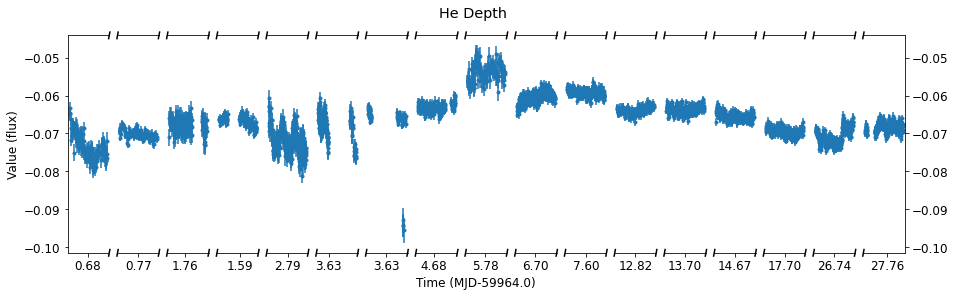

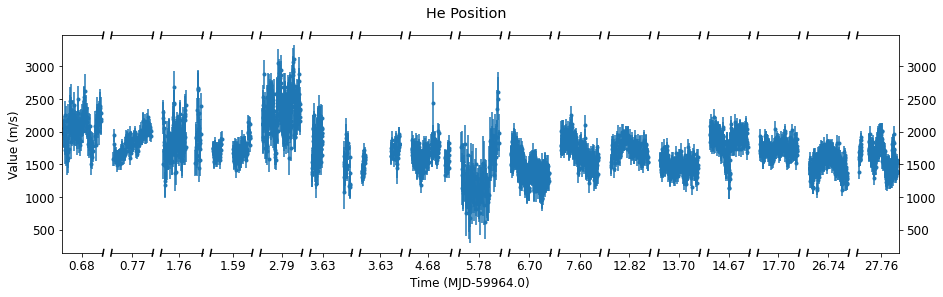

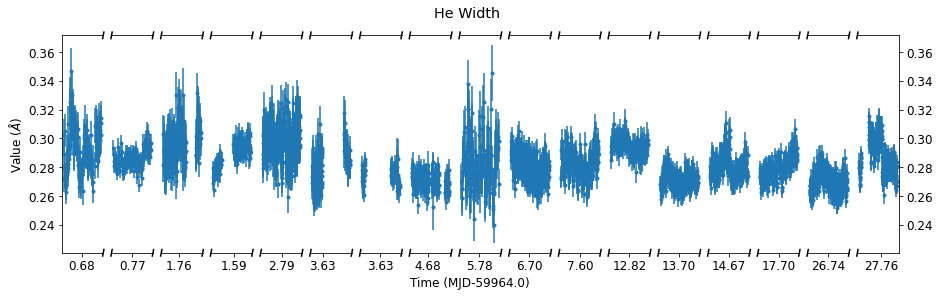

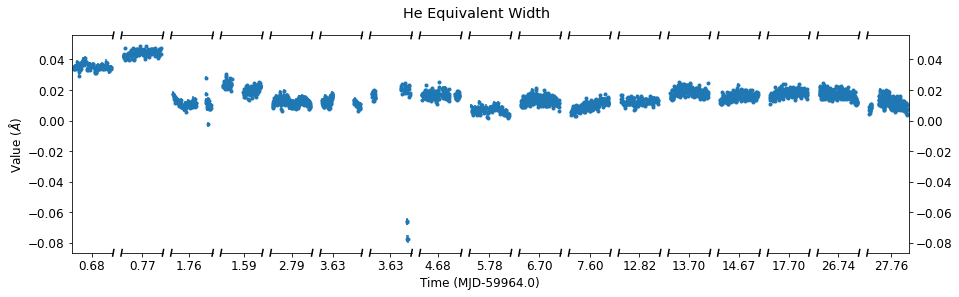

In [31]:
#Plotting one of the parameters of interest for all the days
params_of_interest = ['Depth', 'Position', 'Width', 'Equivalent Width']
units_of_interest = ['(flux)', '(m/s)', '($\AA$)', '($\AA$)'] 
indexes_of_interest = [0, 2, 3, -1]

#Reference value of the line of interest
ref_wav = AF.air2vac((10830.33977+10830.25010)/2) #From NIST database

#Line of interest 
line_name = 'He'

#Dictionnaries of interest
param_dictionnary = fit_params_dict
err_dictionnary = fit_err_dict
time_dictionnary = time_dict

#Define excess in time
excess=59964.0

for i in range(len(params_of_interest)):
    fig, axs = plt.subplots(1, len(param_dictionnary.keys()), sharey=True, figsize=[15, 4])
    fig.suptitle(line_name+' '+params_of_interest[i], fontsize="x-large")
    axs = axs.ravel()

    # Loop over the keys and values in the param_dictionnary dictionary
    for day in param_dictionnary:
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)

        param_list = np.array([param[indexes_of_interest[i]] for param in param_dictionnary[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in err_dictionnary[day]])
        time_list = np.array([time-excess for time in time_dictionnary[day]])
        if params_of_interest[i]=='Position':
            axs[index].errorbar(time_list, (param_list-ref_wav)*3e8/ref_wav, yerr=err_list*3e8/ref_wav, fmt='.', label=day)
        else:
            axs[index].errorbar(time_list, param_list, yerr=err_list, fmt='.', label=day)

        #Adding the breaks
        d = .015  

        if index==0:
            axs[index].spines['right'].set_visible(False)
            axs[index].set_ylabel('Value '+units_of_interest[i], fontsize=12)
            kwargs = dict(transform=axs[index].transAxes, color='k', clip_on=False)
            axs[index].plot((1-d, 1+d), (-d, +d), **kwargs) #Bottom right
            axs[index].plot((1-d, 1+d), (1-d, 1+d), **kwargs) #Top right
            axs[index].tick_params(axis='both', labelsize=12)
            axs[index].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        elif index==len(fit_params_dict.keys())-1:
            axs[index].spines['left'].set_visible(False)
            axs[index].yaxis.tick_right()
            axs[index].tick_params(axis='both', labelright='off', labelsize=12)

            kwargs.update(transform=axs[index].transAxes)
            axs[index].plot((-d, +d), (1-d, 1+d), **kwargs) #Top left
            axs[index].plot((-d, +d), (-d, +d), **kwargs) #Bottom left
            axs[index].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        else:
            axs[index].spines['right'].set_visible(False)
            axs[index].spines['left'].set_visible(False)
            axs[index].get_yaxis().set_visible(False)

            kwargs = dict(transform=axs[index].transAxes, color='k', clip_on=False)
            axs[index].plot((1-d, 1+d), (-d, +d), **kwargs)
            axs[index].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

            kwargs.update(transform=axs[index].transAxes)
            axs[index].plot((-d, +d), (1-d, 1+d), **kwargs)
            axs[index].plot((-d, +d), (-d, +d), **kwargs)
            
            axs[index].tick_params(axis='x', labelsize=12)
            axs[index].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        axs[index].set_xticks([np.mean(time_list)])
        axs[int(len(key_list)/2)+1].set_xlabel('Time (MJD-'+str(excess)+')', ha='right', fontsize=12)

    plt.show()



# Inspecting the periodograms and fitting long-term trend - He triplet

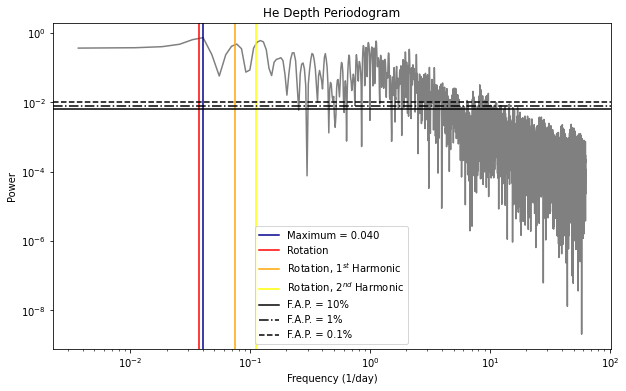

Curve fit results used as initial guess:
Amplitude is: 0.007484444707505034
Phase is: 762.0734236948582
Offset is: -0.06690999576447039
Period is: 26.05306314814501


  0%|                                                | 0/100000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████| 100000/100000 [05:04<00:00, 328.09it/s]


Mean of Amplitude: 0.0074844339110363535
Median of Amplitude: 0.0074844209453080925
Best of Amplitude: 0.007484385519489724


Mean of Phase: 762.0734237000789
Median of Phase: 762.0734236761175
Best of Phase: 762.0734235987742


Mean of Offset: -0.06690999127723012
Median of Offset: -0.06691001155473134
Best of Offset: -0.06690989902946363


Mean of Period: 26.053063166846787
Median of Period: 26.053063164656766
Best of Period: 26.053063206777466




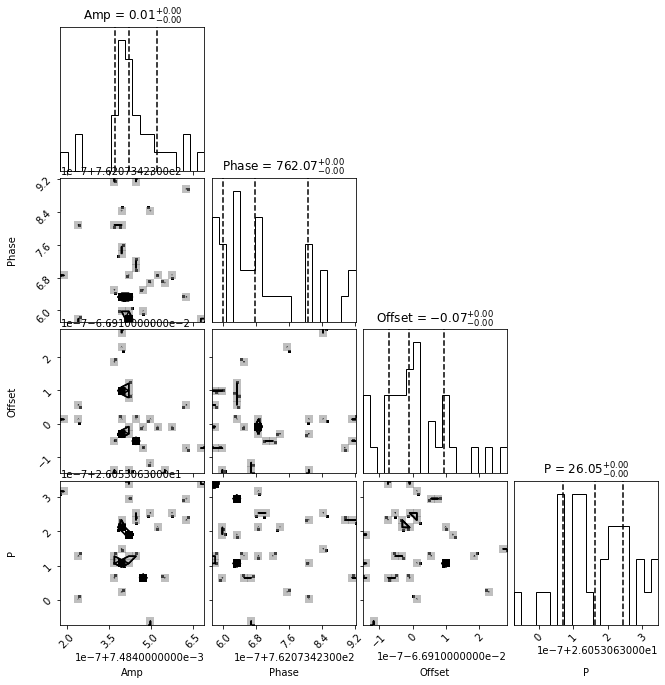

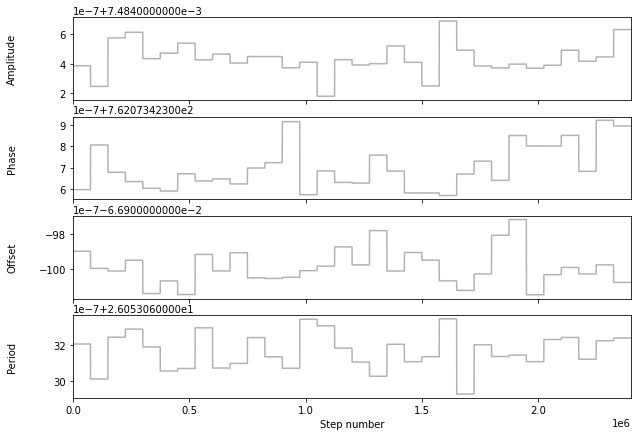

chisq=12138.264872711352  with 3404 degrees of freedom
Depth


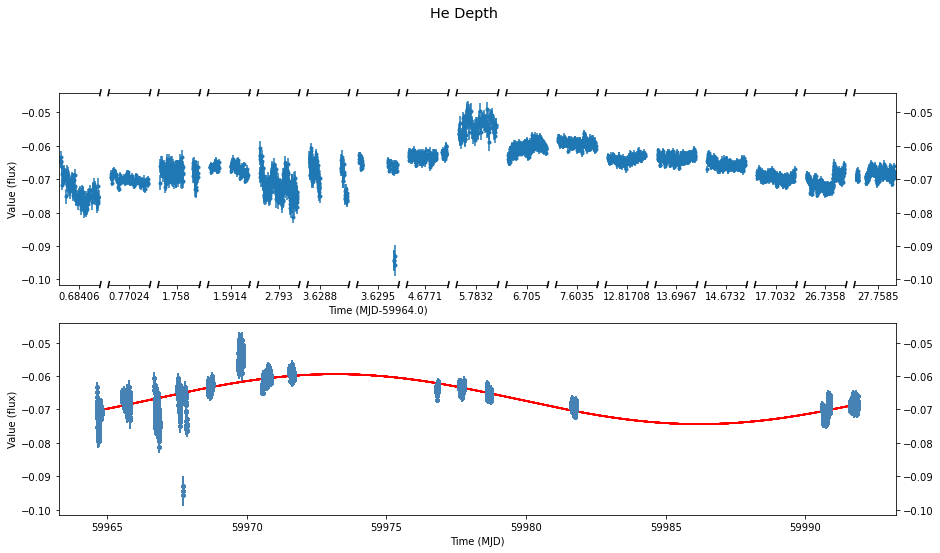

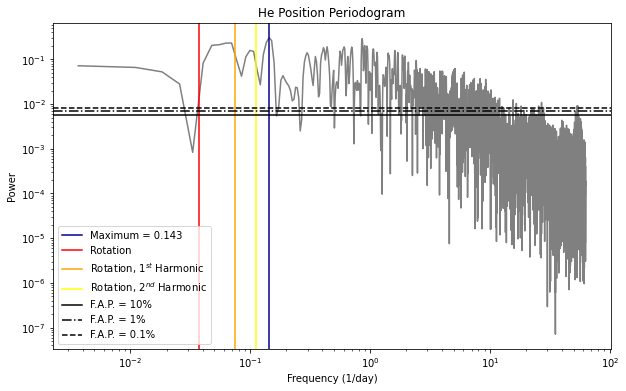

Curve fit results used as initial guess:
Amplitude is: -0.008472922129981955
Phase is: 0.08866537725067808
Offset is: 10833.324041022106
Period is: 6.9836017806433635


  0%|                                                | 0/100000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████| 100000/100000 [05:06<00:00, 325.76it/s]


Mean of Amplitude: -0.008472950131637964
Median of Amplitude: -0.008472961322942691
Best of Amplitude: -0.008472983960922893


Mean of Phase: 0.08866537166398301
Median of Phase: 0.08866537579127334
Best of Phase: 0.08866535562386006


Mean of Offset: 10833.32404105299
Median of Offset: 10833.324041048863
Best of Offset: 10833.324041114356


Mean of Period: 6.983601779638777
Median of Period: 6.98360176837349
Best of Period: 6.983601820926854




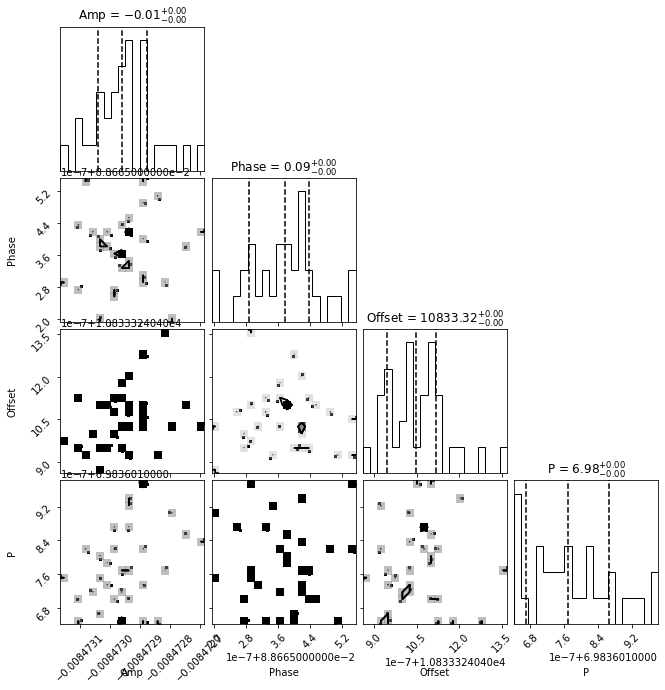

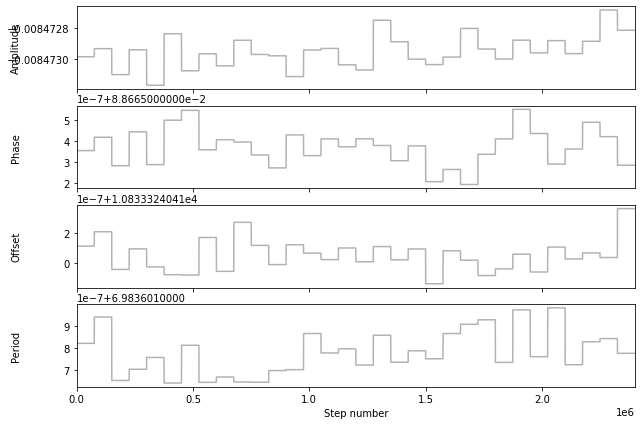

chisq=8927.89245292958  with 3404 degrees of freedom
Position


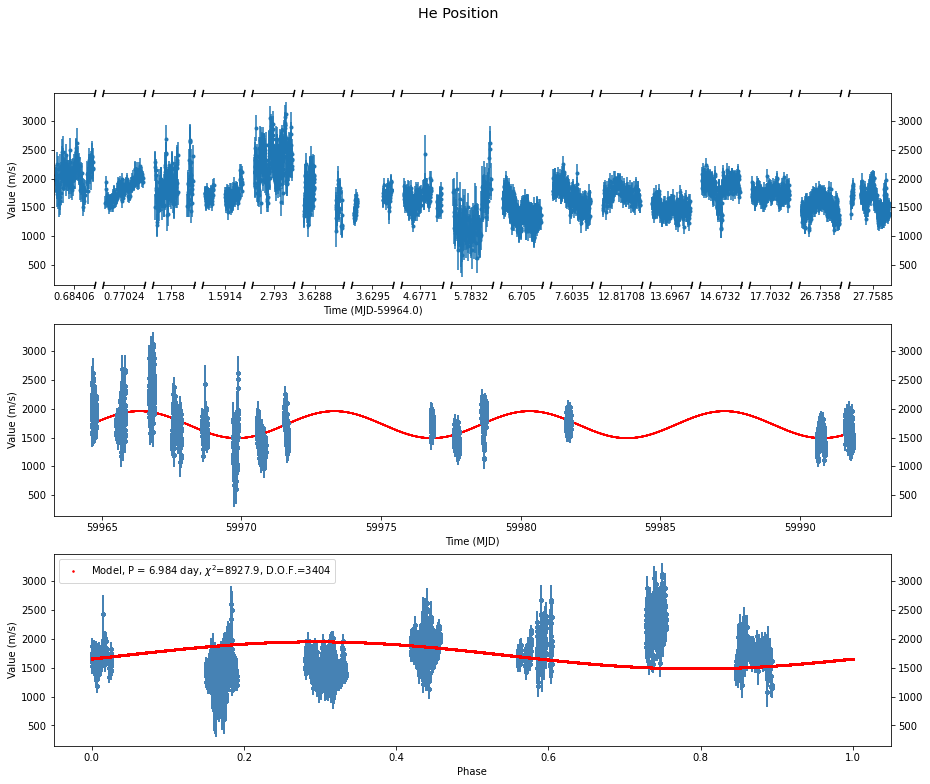

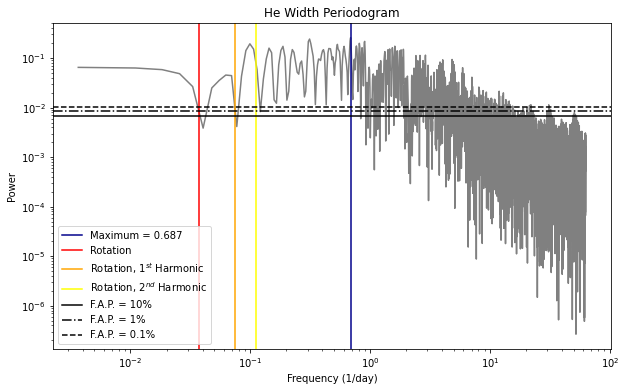

Curve fit results used as initial guess:
Amplitude is: 0.01009269673749642
Phase is: 649.1277911506655
Offset is: 0.2819861087315004
Period is: 1.4596847323157613


  0%|                                                | 0/100000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████| 100000/100000 [05:06<00:00, 326.28it/s]


Mean of Amplitude: 0.010092686699353528
Median of Amplitude: 0.010092695921461258
Best of Amplitude: 0.010092641573903256


Mean of Phase: 649.1277911623658
Median of Phase: 649.1277911575037
Best of Phase: 649.1277911114353


Mean of Offset: 0.28198609719800055
Median of Offset: 0.28198610356068904
Best of Offset: 0.28198612947170076


Mean of Period: 1.459684710740961
Median of Period: 1.459684702534004
Best of Period: 1.459684531793734




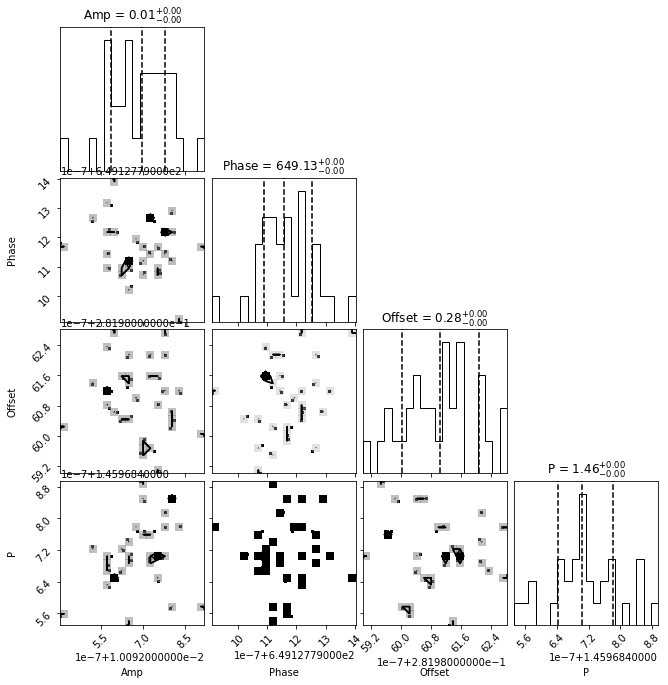

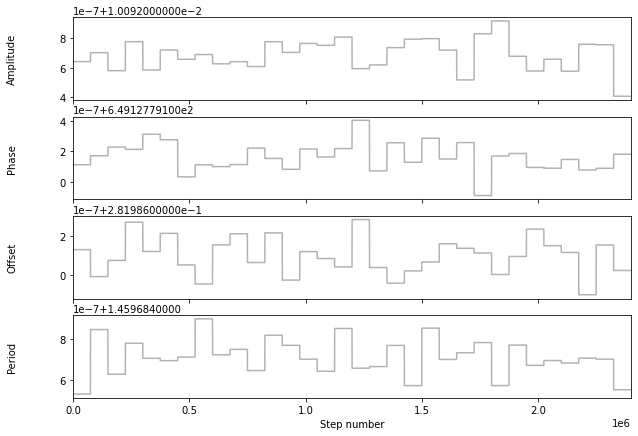

chisq=7754.321689632259  with 3404 degrees of freedom
Width


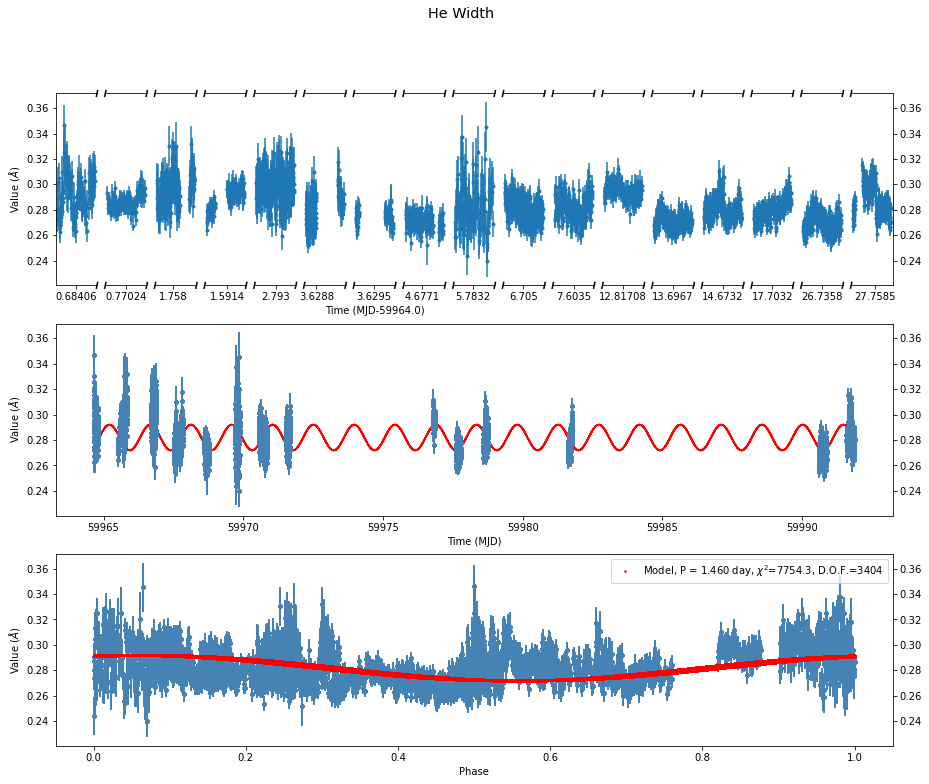

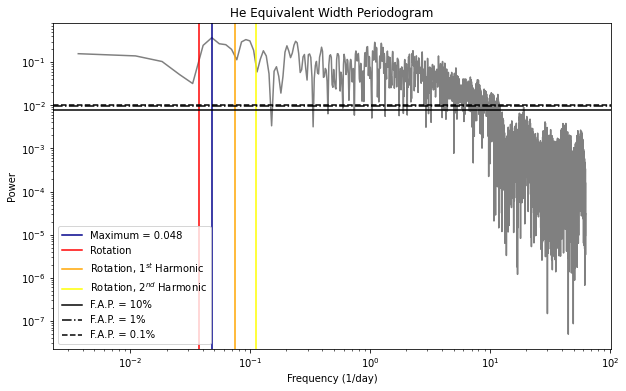

Curve fit results used as initial guess:
Amplitude is: 0.00753481639075878
Phase is: -25197.856968818
Offset is: 0.020065881217372194
Period is: -11.048422244911366


  0%|                                                | 0/100000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████████████████████████████| 100000/100000 [05:09<00:00, 323.49it/s]


Mean of Amplitude: 0.007534799451233292
Median of Amplitude: 0.007534805249411816
Best of Amplitude: 0.007534785153860014


Mean of Phase: -25197.8569688346
Median of Phase: -25197.856968829066
Best of Phase: -25197.856968788947


Mean of Offset: 0.02006584013904795
Median of Offset: 0.02006585196948968
Best of Offset: 0.020066027896072567


Mean of Period: -11.048422235530055
Median of Period: -11.048422225865707
Best of Period: -11.048422277892875




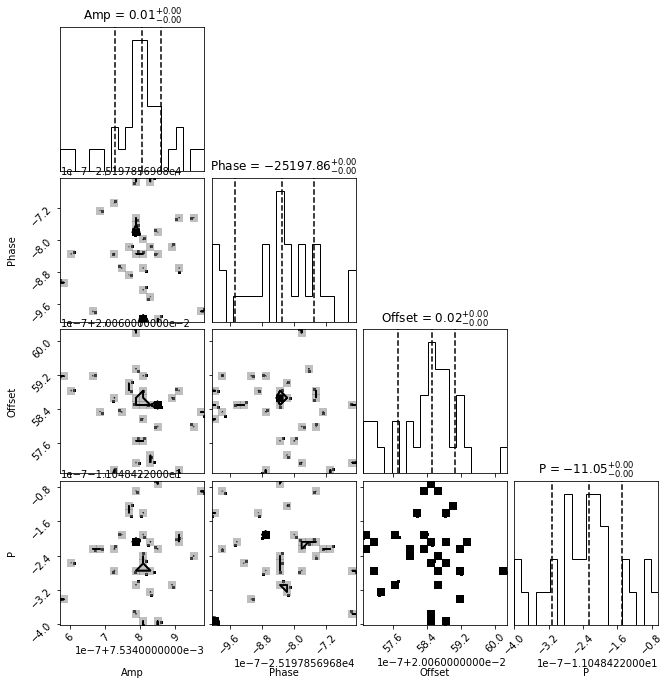

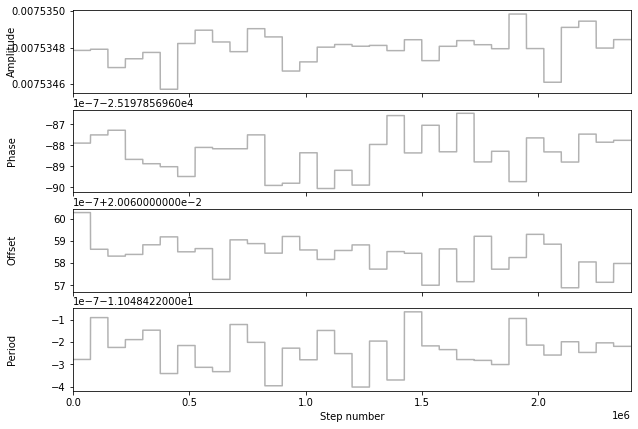

chisq=269312.21491216804  with 3404 degrees of freedom
Equivalent Width


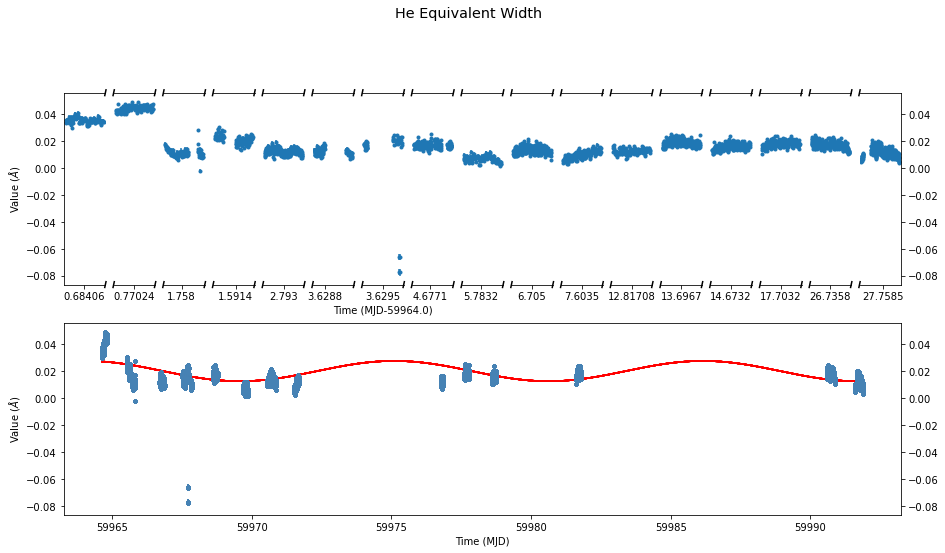

In [81]:
reload(AF)
#Frequency of oscillation 
oscillation_freq = 24*60/5.4 #in 1/days!!

#Line of interest 
line_name = 'He'

for i in range(len(params_of_interest)):
    long_param = []
    long_param_err = []
    long_time = []
    
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in param_dictionnary:
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)

        param_list = [param[indexes_of_interest[i]] for param in param_dictionnary[day]]
        err_list = [err[indexes_of_interest[i]] for err in err_dictionnary[day]]
        time_list = [time for time in time_dictionnary[day]]

        long_param.append(param_list)
        long_param_err.append(err_list)
        long_time.append(time_list)

    long_param = np.array(list(itertools.chain.from_iterable(long_param)))
    long_param_err = np.array(list(itertools.chain.from_iterable(long_param_err)))
    long_time = np.array(list(itertools.chain.from_iterable(long_time)))
    
    LS = LombScargle(long_time, long_param, long_param_err).autopower(nyquist_factor=1) 
    probas = [0.1, 0.01, 0.001]
    FAP = LombScargle(long_time, long_param, long_param_err).false_alarm_level(probas, method='bootstrap', nyquist_factor=1)  
    
    plt.figure(figsize=[10, 6])
    plt.loglog(LS[0], LS[1], color='grey')
    if max(LS[1])>FAP[0]:
        max_power = np.where(LS[1]==max(LS[1]))
        plt.axvline(LS[0][max_power], color='darkblue', label='Maximum = %.3f' %LS[0][max_power])
    plt.axvline(1/27, color='r', label='Rotation')
    plt.axvline(2/27, color='orange', label='Rotation, $1^{st}$ Harmonic')
    plt.axvline(3/27, color='yellow', label='Rotation, $2^{nd}$ Harmonic')
    plt.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
    plt.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
    plt.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
    plt.xlabel('Frequency (1/day)')
    plt.ylabel('Power')
    plt.title(line_name+' '+params_of_interest[i]+' Periodogram')
    plt.legend()
    plt.show()
    
    #Fitting the long-term trend to the data
    #Getting estimate of period from the periodogram
    important_freq = LS[0][max_power]
    important_p = important_freq[0]**(-1)
    #Curve-fit -- first guess
    guess = [-0.0003, 0.005, np.median(long_param), important_p]
    best_fit_theta, best_fit_err = curve_fit(AF.sinusoid, long_time, long_param, sigma = long_param_err, p0=guess, maxfev=1000000)
    
    print('Curve fit results used as initial guess:')
    print('Amplitude is: '+str(best_fit_theta[0]))
    print('Phase is: '+str(best_fit_theta[1]))
    print('Offset is: '+str(best_fit_theta[2]))
    print('Period is: '+str(best_fit_theta[3]))
    
    #MCMC 
    # Define the log-likelihood function
    def log_likelihood(parameters, t, y, y_err):
        model_predictions = AF.sinusoid(t, *parameters)
        residuals = y - model_predictions
        chi_squared = np.sum((residuals/y_err)**2)
        log_likelihood = -0.5 * chi_squared
        return log_likelihood

    # Define the log-prior function
    def log_prior(parameters, sigma_P = 5):
        # Uniform priors on all parameters
        if 0 < parameters[0] < 100:
            prior_A = -np.log(100)
        else:
            prior_A = -np.inf
        if -np.pi < parameters[1] < np.pi:
            prior_B = -np.log(2*np.pi)
        else:
            prior_B = -np.inf
        if 30 > parameters[2] > 20:
            prior_D = -np.log(10)#-0.5*np.log(2*np.pi*sigma_P**2) -0.5*(parameters[2]/sigma_P)**2
        else:
            prior_D = -np.inf
        if -100 < parameters[3] < 100:
            prior_C = -np.log(200)
        else:
            prior_C = -np.inf
        return prior_A + prior_B + prior_C + prior_D

    # Define the log-posterior function
    def log_posterior(parameters, t, y, y_err):
        lp = log_prior(parameters)
        return lp + log_likelihood(parameters, t, y, y_err)

    #Run MCMC
    # Set up the MCMC sampler
    nwalkers = 32
    ndim = 4
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(long_time, long_param, long_param_err))

    # Initialize the walkers
    start_point = [best_fit_theta[0], best_fit_theta[1], best_fit_theta[2], best_fit_theta[3]]
    p0 =[start_point+1e-7*np.random.randn(ndim) for i in range(nwalkers)]

    # Run the MCMC sampler
    nsteps = 100000
    pos, prob, state = sampler.run_mcmc(p0, nsteps, progress=True)

    # Extract the chain and discard burn-in samples
    burnin = int(nsteps/4)

    samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))

    #Getting best values of MCMC
    best_MCMC = samples[np.argmax(prob)]

    #Presenting results
    labels = ["Amplitude", "Phase", "Offset", 'Period']
    for l in range(ndim):
        print('Mean of '+labels[l]+': '+str(np.mean(samples[:, l])))
        print('Median of '+labels[l]+': '+str(np.median(samples[:, l])))
        print('Best of '+labels[l]+': '+str(best_MCMC[l]))
        print('\n')

    #Plotting the corner plot
    corner.corner(samples, labels=['Amp', 'Phase', 'Offset', 'P'], 
                  quantiles=[0.16, 0.5, 0.84], show_titles=True)

    # Plot the posterior samples
    fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
    for j in range(ndim):
        ax = axes[j]
        ax.plot(samples[:, j], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[j])
        ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("Step number")
    plt.show()

    #Evaluating the model and its spread
    simulated_time = np.linspace(long_time[0], long_time[-1], 10000)
    model = AF.sinusoid(simulated_time, *best_MCMC)
    
    #Looking at the spread
    models=[]
    draw = np.floor(np.random.uniform(0,len(samples),size=10000)).astype(int)
    thetas = samples[draw]
    for k in thetas:
        mod = AF.sinusoid(long_time, *k)
        models.append(mod)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)

    
    #Evaluating the goodness of fit - chi-squared
    residuals = long_param - AF.sinusoid(long_time, *best_MCMC)
    chisq = np.sum((residuals/long_param_err)**2)
    Dof = len(long_param) - len(best_fit_theta)
    print('chisq='+str(chisq), ' with '+str(Dof)+' degrees of freedom')

    #Plotting
    fig, axes = plt.subplot_mosaic("ABCDEFGHIJKLMNOPQ;RRRRRRRRRRRRRRRRR;SSSSSSSSSSSSSSSSS", figsize=[15, 12])
                                                                        
    subplot_list = "ABCDEFGHIJKLMNOPQ"
    
    print(params_of_interest[i])
    fig.suptitle(line_name+' '+params_of_interest[i], fontsize="x-large")
    
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in param_dictionnary:
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)
        param_list = np.array([param[indexes_of_interest[i]] for param in param_dictionnary[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in err_dictionnary[day]])
        time_list = np.array([time-excess for time in time_dictionnary[day]])
        
        if params_of_interest[i]=='Position':
            axes[subplot_list[index]].errorbar(time_list, (param_list-ref_wav)*3e8/ref_wav, yerr=err_list*3e8/ref_wav, fmt='.')
            axes['R'].plot(simulated_time, (model-ref_wav)*3e8/ref_wav, 'r', label='Best-fit Model')
            axes['R'].errorbar(long_time, (long_param-ref_wav)*3e8/ref_wav, yerr=long_param_err*3e8/ref_wav, fmt='.', color='steelblue')

            if important_freq > 3/27:
                axes['S'].errorbar(AF.phasefold(long_time, np.mean(long_time), important_freq), (long_param-ref_wav)*3e8/ref_wav, yerr=long_param_err*3e8/ref_wav, fmt='.', color='steelblue', zorder=1)
                line1=axes['S'].plot(AF.phasefold(simulated_time, np.mean(simulated_time), important_freq), (model-ref_wav)*3e8/ref_wav, 'r.', zorder=2, markersize=3)
                
                axes['S'].set_xlabel('Phase')
                axes['S'].set_ylabel('Value '+units_of_interest[i])
                axes['S'].tick_params(left=True, right=True, labelright='off')

                axes['S'].legend(line1, ['Model, P = %.3f day'%best_fit_theta[-1]+', $\chi^2$=%.1f'%chisq+', D.O.F.='+str(Dof)])
            else:
                axes['S'].set_visible(False)
        else:
            axes[subplot_list[index]].errorbar(time_list, param_list, yerr=err_list, fmt='.')
            axes['R'].plot(simulated_time, model, 'r', label='Best-fit Model')
            axes['R'].errorbar(long_time, long_param, yerr=long_param_err, fmt='.', color='steelblue')

            if important_freq > 3/27:
                axes['S'].errorbar(AF.phasefold(long_time, np.mean(long_time), important_freq), long_param, yerr=long_param_err, fmt='.', color='steelblue', zorder=1)
                line1=axes['S'].plot(AF.phasefold(simulated_time, np.mean(simulated_time), important_freq), model, 'r.', zorder=2, markersize=3)

                axes['S'].set_xlabel('Phase')
                axes['S'].set_ylabel('Value '+units_of_interest[i])
                axes['S'].tick_params(left=True, right=True, labelright='off')

                axes['S'].legend(line1, ['Model, P = %.3f day'%best_fit_theta[-1]+', $\chi^2$=%.1f'%chisq+', D.O.F.='+str(Dof)])
            else:
                axes['S'].set_visible(False)


        axes['R'].set_xlabel('Time (MJD)')
        axes['R'].set_ylabel('Value '+units_of_interest[i])
        axes['R'].tick_params(left=True, right=True, labelright='off')

        #Adding the breaks
        d = .015  

        if index==0:
            axes[subplot_list[index]].spines['right'].set_visible(False)
            axes[subplot_list[index]].set_ylabel('Value '+units_of_interest[i])
            kwargs = dict(transform=axes[subplot_list[index]].transAxes, color='k', clip_on=False)
            axes[subplot_list[index]].plot((1-d, 1+d), (-d, +d), **kwargs) #Bottom right
            axes[subplot_list[index]].plot((1-d, 1+d), (1-d, 1+d), **kwargs) #Top right

        elif index==len(fit_params_dict.keys())-1:
            axes[subplot_list[index]].sharey(axes[subplot_list[0]])
            axes[subplot_list[index]].spines['left'].set_visible(False)
            axes[subplot_list[index]].yaxis.tick_right()
            axes[subplot_list[index]].tick_params(labelright='off')

            kwargs.update(transform=axes[subplot_list[index]].transAxes)
            axes[subplot_list[index]].plot((-d, +d), (1-d, 1+d), **kwargs) #Top left
            axes[subplot_list[index]].plot((-d, +d), (-d, +d), **kwargs) #Bottom left

        else:
            axes[subplot_list[index]].sharey(axes[subplot_list[0]])
            axes[subplot_list[index]].spines['right'].set_visible(False)
            axes[subplot_list[index]].spines['left'].set_visible(False)
            axes[subplot_list[index]].get_yaxis().set_visible(False)

            kwargs = dict(transform=axes[subplot_list[index]].transAxes, color='k', clip_on=False)
            axes[subplot_list[index]].plot((1-d, 1+d), (-d, +d), **kwargs)
            axes[subplot_list[index]].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

            kwargs.update(transform=axes[subplot_list[index]].transAxes)
            axes[subplot_list[index]].plot((-d, +d), (1-d, 1+d), **kwargs)
            axes[subplot_list[index]].plot((-d, +d), (-d, +d), **kwargs)

        axes[subplot_list[index]].set_xticks([np.mean(time_list)])
        axes[subplot_list[7]].set_xlabel('Time (MJD-'+str(excess)+')', ha='right')
        
    plt.show()

# Plotting the big dataset - Si Line

# Inspecting the periodograms and fitting long-term trend - Si line

# Extracting the HARPS data and plotting the Calcium stellar activity indicator

In [6]:
HARPS_file = np.loadtxt(HARPS_directory+'SUN_harps.rdb', skiprows=2)

BJD_date = HARPS_file[:, 0]
vrad = HARPS_file[:, 1]
vrad_err = HARPS_file[:, 2]
old_rhk = HARPS_file[:, 9]
old_rhk_err = HARPS_file[:, 10]

low_rhk = -5.02
high_rhk = -4.95

rhk_BJD_date = AF.bound(low_rhk, high_rhk, old_rhk, BJD_date)
rhk = AF.bound(low_rhk, high_rhk, old_rhk, old_rhk)
rhk_err = AF.bound(low_rhk, high_rhk, old_rhk, old_rhk_err)
new_vrad = AF.bound(low_rhk, high_rhk, old_rhk, vrad)
new_vrad_err = AF.bound(low_rhk, high_rhk, old_rhk, vrad_err)

For R_HK
parameter: Amplitude Cos: 6.376934904687282
   95% conf interval: -130.53748142543873 143.2913512348133
   tstat: 0.07661134544548387
   pstat: 0.9389328484817794
parameter: Amplitude Sin: 17.71059462497527
   95% conf interval: -45.18764550684783 80.60883475679836
   tstat: 0.4631534820661538
   pstat: 0.6432551156354398
parameter: Offset: 1.3600295385024295
   95% conf interval: -135.55439737954958 138.27445645655445
   tstat: 0.016339148241286496
   pstat: 0.9869638504587026
parameter: Period: 63277.75319477463
   95% conf interval: -616911.771357451 743467.2777470002
   tstat: 0.15302112697085443
   pstat: 0.878381846972853
Max. period from periodogram =  16440.616410000002  days


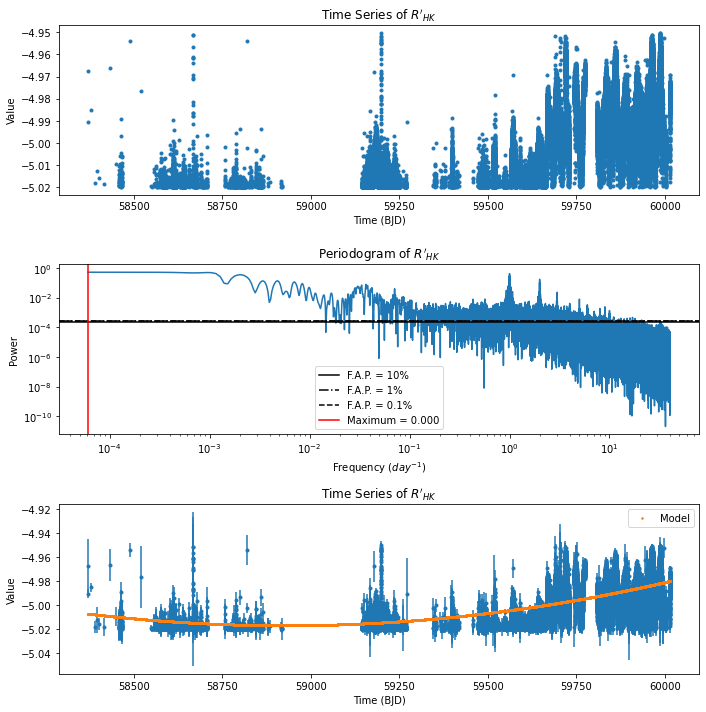

For Vrad
parameter: Amplitude Cos: 0.016726217412068076
   95% conf interval: 0.016582909676140987 0.016869525147995165
   tstat: 191.9810611466611
   pstat: 0.0
parameter: Amplitude Sin: -3.0414355775151973
   95% conf interval: -4.500872345190555 -1.5819988098398399
   tstat: -3.4278643205560084
   pstat: 0.0006085337287347059
parameter: Offset: 0.11395336643548623
   95% conf interval: 0.11384893766378087 0.11405779520719159
   tstat: 1794.8876731171006
   pstat: 0.0
parameter: Period: 402.9979065375036
   95% conf interval: 402.36525381643264 403.6305592585745
   tstat: 1047.7741867814982
   pstat: 0.0
Max. period from periodogram =  400.9906441463415  days


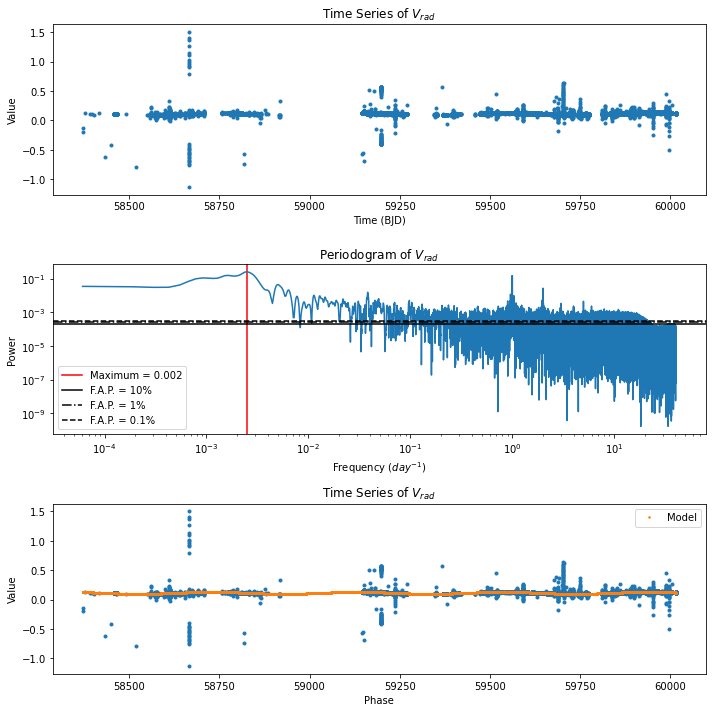

In [7]:
reload(AF)
#Calcium indicator 

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[10, 10])
ax1.plot(rhk_BJD_date, rhk, '.')
ax1.set_xlabel('Time (BJD)')
ax1.set_ylabel('Value')
ax1.set_title('Time Series of $R\'_{HK}$')

ls = LombScargle(rhk_BJD_date, rhk, rhk_err)
LS = ls.autopower(nyquist_factor=1)
probas = [0.1, 0.01, 0.001]
FAP = ls.false_alarm_level(probas, nyquist_factor=1)  

ax2.loglog(LS[0], LS[1])
ax2.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
ax2.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
ax2.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')

if max(LS[1])>FAP[0]:
    max_power= np.where(LS[1]==max(LS[1]))
    ax2.axvline(LS[0][max_power], color='r', label='Maximum = %.3f' %LS[0][max_power])
ax2.set_xlabel('Frequency ($day^{-1}$)')
ax2.set_ylabel('Power')
ax2.set_title('Periodogram of $R\'_{HK}$')
ax2.legend()

#Fitting the long-term trend to the data
important_freq = LS[0][max_power]

#Setting a guess
iniguess=[0.4, 1e-5, np.median(rhk), important_freq[0]**(-1)]

best_fit_theta, best_fit_err = curve_fit(AF.sinusoid, rhk_BJD_date, rhk, sigma=rhk_err, p0=iniguess, maxfev=20000)

#Evaluating the model
simulated_time = np.linspace(rhk_BJD_date[0], rhk_BJD_date[-1], 10000)
model = AF.sinusoid(simulated_time, *best_fit_theta)

#Evaluating statistical significance
print('For R_HK')
param_name = ['Amplitude Cos', 'Amplitude Sin', 'Offset', 'Period']
AF.eval_stat(best_fit_theta, rhk_BJD_date, rhk, AF.sinusoid, param_name)
print('Max. period from periodogram = ', 1/important_freq[0], ' days')

ax3.errorbar(rhk_BJD_date, rhk, yerr=rhk_err, fmt='.', zorder=1)
ax3.plot(simulated_time, model, '.', label='Model', markersize=3, zorder=2)
ax3.set_xlabel('Time (BJD)')
ax3.set_ylabel('Value')
ax3.set_title('Time Series of $R\'_{HK}$')
ax3.legend()
fig.tight_layout()
plt.show()

#Radial velocity
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[10, 10])
ax1.errorbar(rhk_BJD_date, new_vrad, yerr=new_vrad_err, fmt='.')
ax1.set_xlabel('Time (BJD)')
ax1.set_ylabel('Value')
ax1.set_title('Time Series of $V_{rad}$')

ls = LombScargle(rhk_BJD_date, new_vrad, new_vrad_err)
LS = ls.autopower(nyquist_factor=1)
FAP = ls.false_alarm_level(probas, nyquist_factor=1)  

if max(LS[1])>FAP[0]:
    max_power = np.where(LS[1]==max(LS[1]))
    ax2.axvline(LS[0][max_power], color='r', label='Maximum = %.3f' %LS[0][max_power])
ax2.loglog(LS[0], LS[1])
ax2.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
ax2.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
ax2.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
ax2.set_xlabel('Frequency ($day^{-1}$)')
ax2.set_ylabel('Power')
ax2.set_title('Periodogram of $V_{rad}$')
ax2.legend()

#Fitting the long-term trend to the data
important_freq = LS[0][max_power]

#Setting a guess
iniguess=[0.1, 0.1, np.median(new_vrad), important_freq[0]**(-1)]
best_fit_theta, best_fit_err = curve_fit(AF.sinusoid, rhk_BJD_date, new_vrad, sigma=new_vrad_err, p0=iniguess)

#Evaluating the model
simulated_time = np.linspace(rhk_BJD_date[0], rhk_BJD_date[-1], 10000)
model = AF.sinusoid(simulated_time, *best_fit_theta)

#Statistical Significance
print('For Vrad')
AF.eval_stat(best_fit_theta, rhk_BJD_date, new_vrad, AF.sinusoid, param_name)
print('Max. period from periodogram = ', 1/important_freq[0], ' days')
ax3.errorbar(rhk_BJD_date, new_vrad, yerr=new_vrad_err, fmt='.', zorder=1)
ax3.plot(simulated_time, model, '.', label='Model', markersize=3, zorder=2)
ax3.set_xlabel('Phase')
ax3.set_ylabel('Value')
ax3.set_title('Time Series of $V_{rad}$')
ax3.legend()
fig.tight_layout()


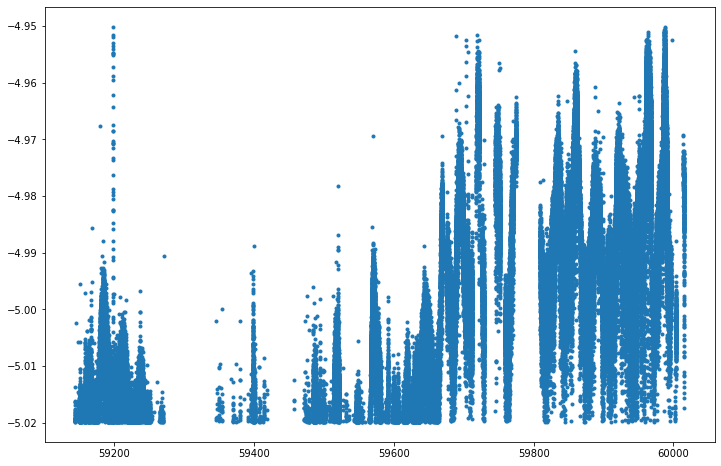

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(rhk_BJD_date[rhk_BJD_date>59000], rhk[rhk_BJD_date>59000], '.')

In [9]:
cut_value = 59940

cut_rhk_BJD_date = rhk_BJD_date[rhk_BJD_date>cut_value]
cut_rhk = rhk[rhk_BJD_date>cut_value]
cut_rhk_err = rhk_err[rhk_BJD_date>cut_value]

#Take only the values during best airmass conditions
cut_down = 0.15
cut_up = 0.25
#Find the start dates for each day
integer_dates = np.unique(np.around(cut_rhk_BJD_date))
best_rhk = []
best_date = []
best_rhk_err = []

#Keep the values only in a certain range
for i in range(len(cut_rhk_BJD_date)):
    for j in range(len(integer_dates)):
        if cut_rhk_BJD_date[i]<integer_dates[j]+cut_up and cut_rhk_BJD_date[i]>integer_dates[j]+cut_down:
            best_date.append(cut_rhk_BJD_date[i])
            best_rhk.append(cut_rhk[i])
            best_rhk_err.append(cut_rhk_err[i])

best_date = np.array(best_date)
best_rhk = np.array(best_rhk)
best_rhk_err = np.array(best_rhk_err)


In [10]:
#Bin the values to one value for each day

#Find the start dates for each day
integer_dates = np.unique(np.around(best_date))
bin_best_rhk = []
bin_best_date = []
bin_best_rhk_err = []

for j in range(len(integer_dates)):
    store_time = []
    store_rhk = []
    store_err = []
    for i in range(len(best_date)):
        if best_date[i] >= integer_dates[j-1] and best_date[i] < integer_dates[j]:
            store_time.append(best_date[i])
            store_rhk.append(best_rhk[i])
            store_err.append(best_rhk_err[i])
    #Skipping first iteration because it is an empty list
    if j>=1:
        bin_best_date.append(np.mean(store_time))
        bin_best_rhk.append(np.mean(store_rhk))
        bin_best_rhk_err.append(np.mean(store_err))

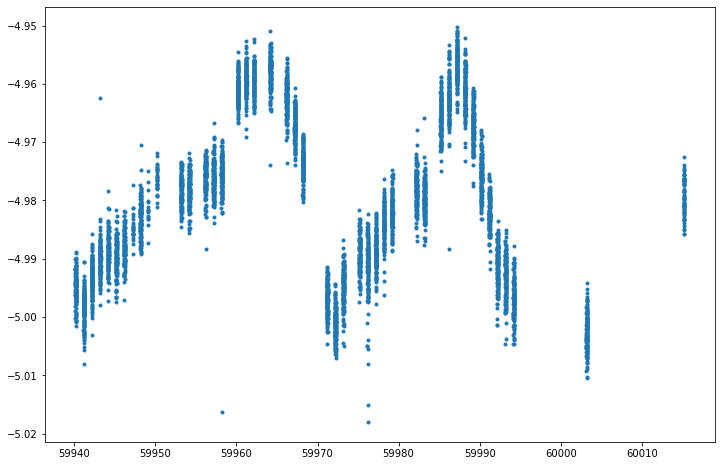

In [11]:
plt.figure(figsize=[12, 8])
plt.plot(best_date, best_rhk, '.')

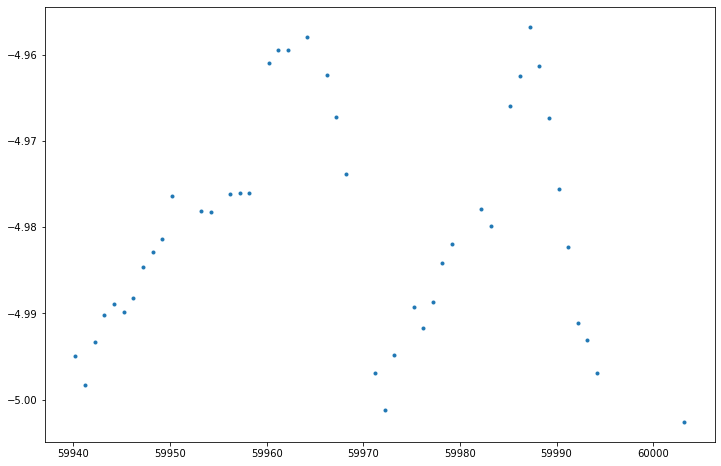

In [12]:
%matplotlib inline 
plt.figure(figsize=[12, 8])
plt.plot(bin_best_date, bin_best_rhk, '.')

Max. period =  27.391779194832726  days


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


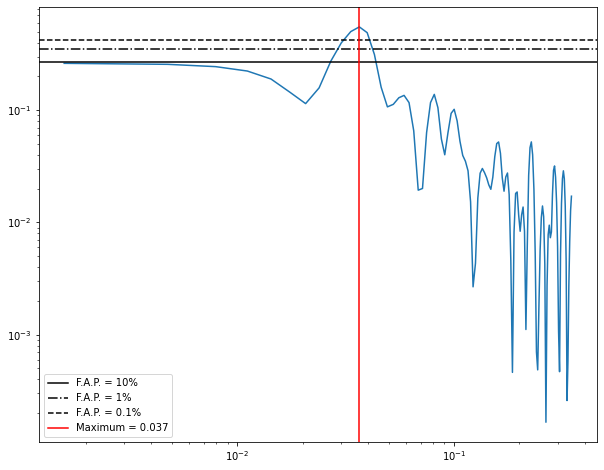

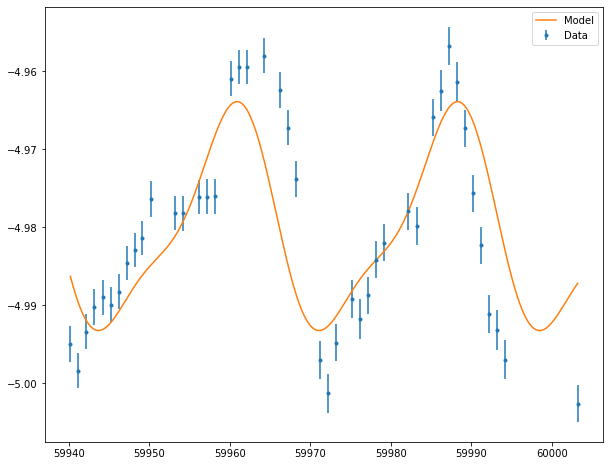

In [13]:
#Perform a periodogram to find the max period of the new binned R_HK signal

ls = LombScargle(bin_best_date, bin_best_rhk, bin_best_rhk_err)
LS = ls.autopower(nyquist_factor=1)
probas = [0.1, 0.01, 0.001]
FAP = ls.false_alarm_level(probas, nyquist_factor=1)  

plt.figure(figsize=[10, 8])
plt.loglog(LS[0], LS[1])
plt.axhline(FAP[0], color='k', label='F.A.P. = '+str(int(100*probas[0]))+'%')
plt.axhline(FAP[1], color='k', linestyle='-.', label='F.A.P. = '+str(int(100*probas[1]))+'%')
plt.axhline(FAP[2], color='k', linestyle='--', label='F.A.P. = '+str(100*probas[2])+'%')
if max(LS[1])>FAP[0]:
    max_power= np.where(LS[1]==max(LS[1]))
    plt.axvline(LS[0][max_power], color='r', label='Maximum = %.3f' %LS[0][max_power])
plt.legend()
print('Max. period = ', 1/LS[0][max_power][0], ' days')


#Using this max period to model the R_HK
period = 1/LS[0][max_power][0]
period2 = period/2
period3 = period/3

#Making the linear model
def big_model(t, offset, a, b, c, A, B, C, D, E, F):
    first_part = a*(A*np.cos(2*np.pi*t/period) + B*np.sin(2*np.pi*t/period))
    second_part = b*(C*np.cos(2*np.pi*t/period2) + D*np.sin(2*np.pi*t/period2))
    third_part = c*(E*np.cos(2*np.pi*t/period3) + F*np.sin(2*np.pi*t/period3))
    return offset+first_part+second_part#+third_part

#Fitting the linear model
best_fit_theta, best_fit_err = curve_fit(big_model, bin_best_date, bin_best_rhk, sigma=bin_best_rhk_err)

#Simulating best-fit model points
model_time = np.linspace(min(bin_best_date), max(bin_best_date), 1000)
model_data = big_model(model_time, *best_fit_theta)

plt.figure(figsize=[10, 8])
plt.errorbar(bin_best_date, bin_best_rhk, yerr=bin_best_rhk_err, fmt='.', label='Data')
plt.plot(model_time, model_data, label='Model')
plt.legend()
plt.show()

# Interpolating the $R_{HK}$ and $V_{rad}$ values to the observations

In [14]:
%matplotlib inline

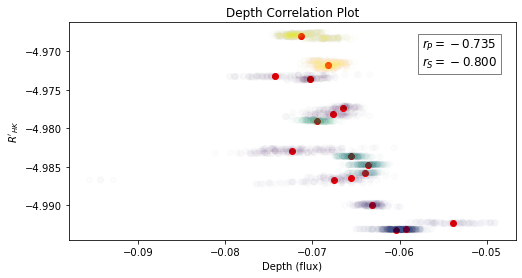

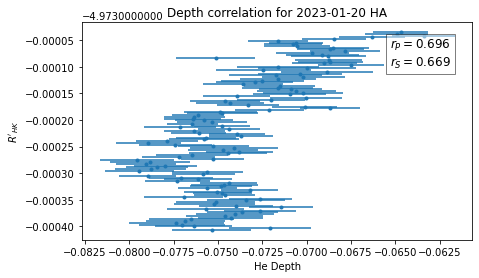

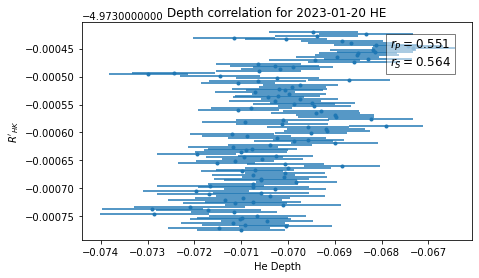

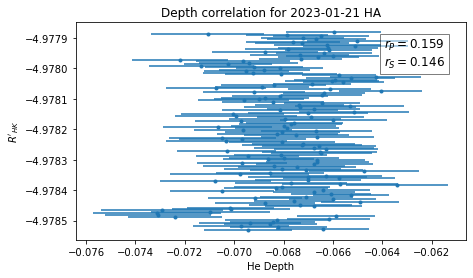

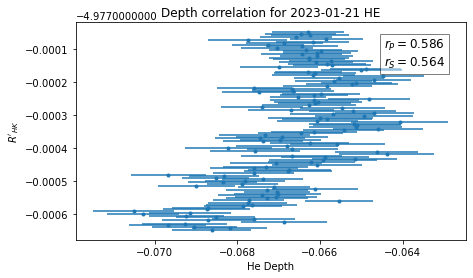

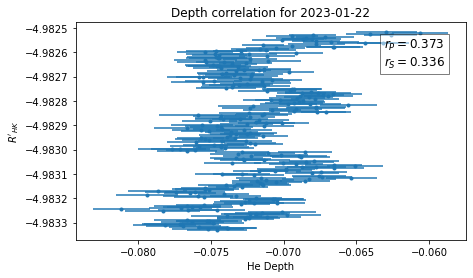

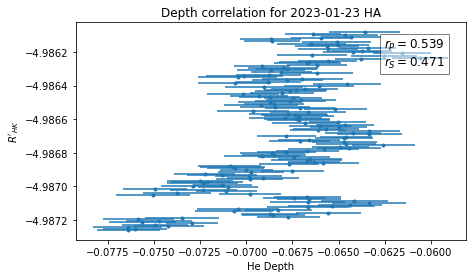

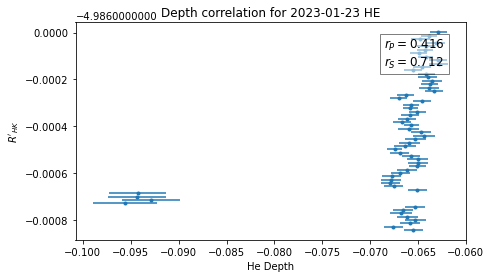

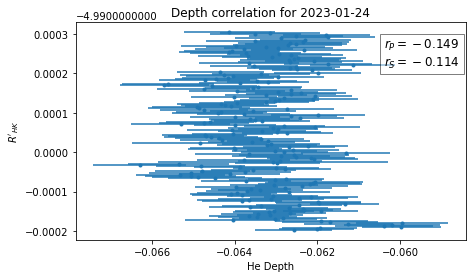

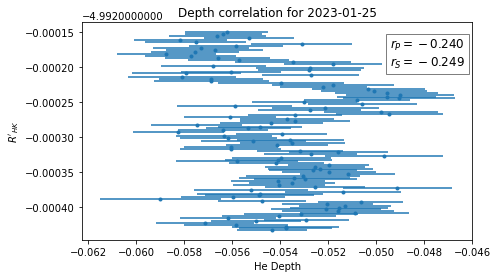

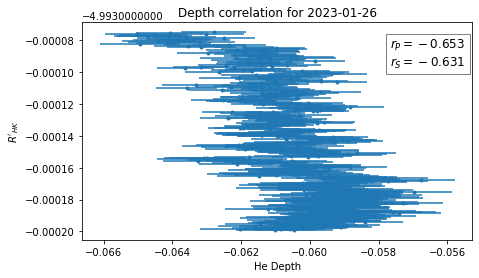

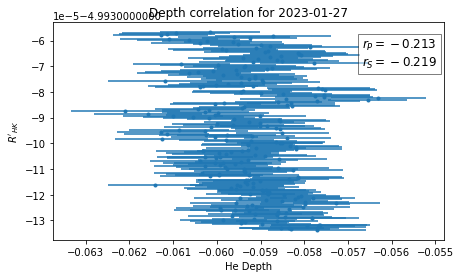

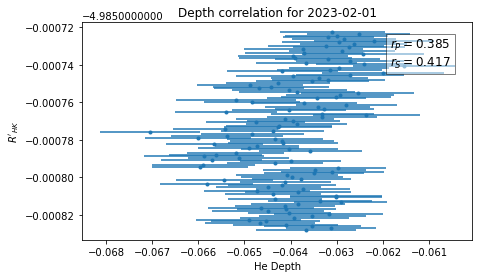

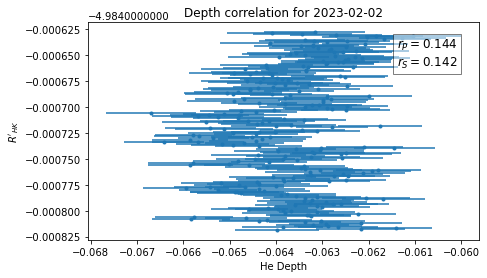

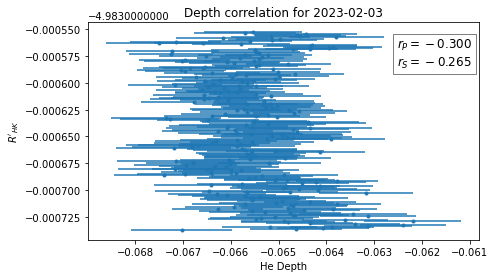

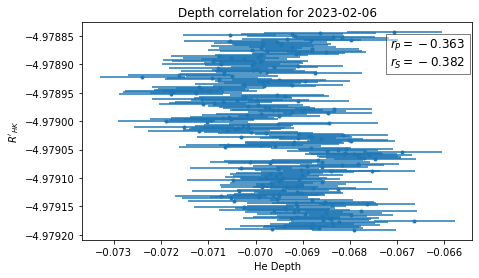

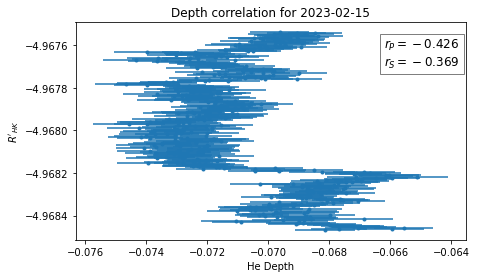

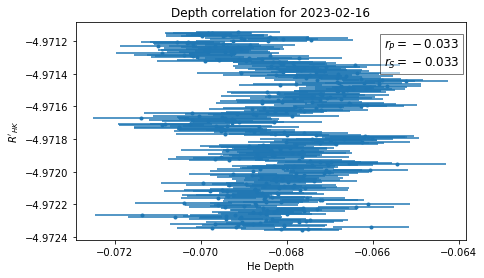

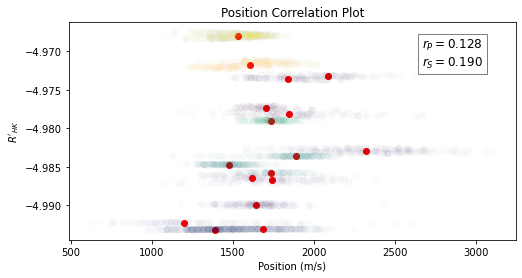

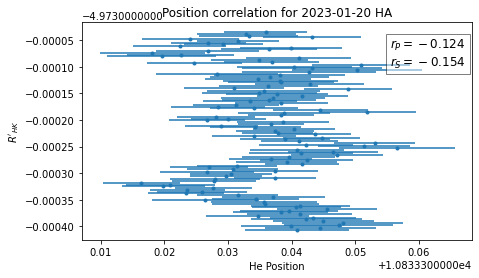

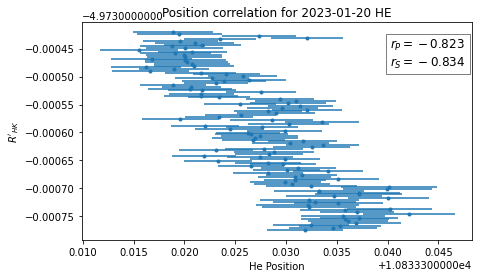

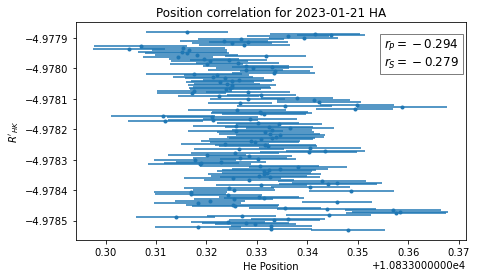

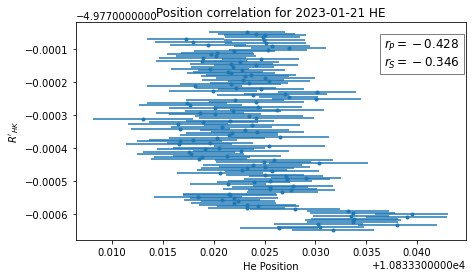

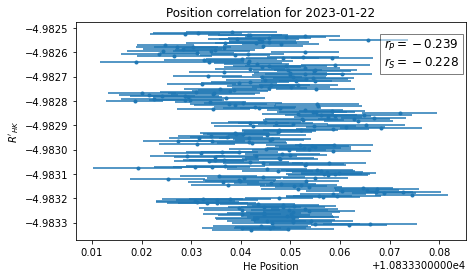

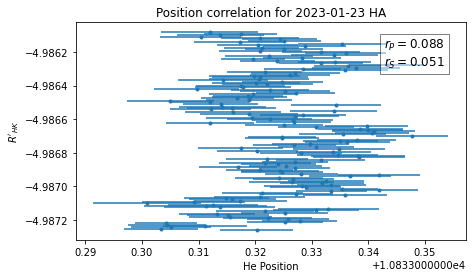

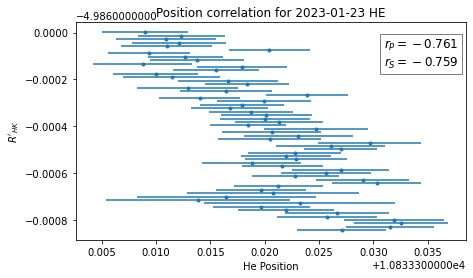

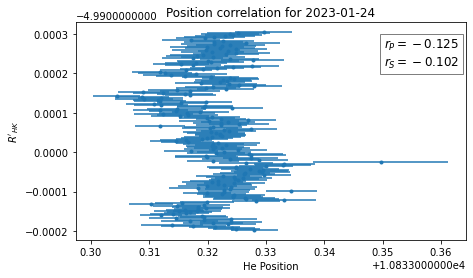

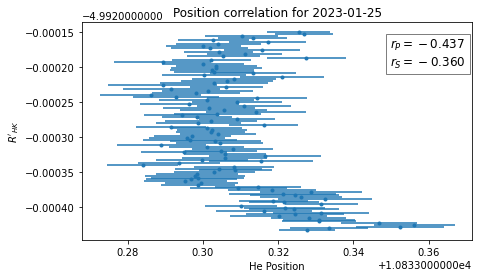

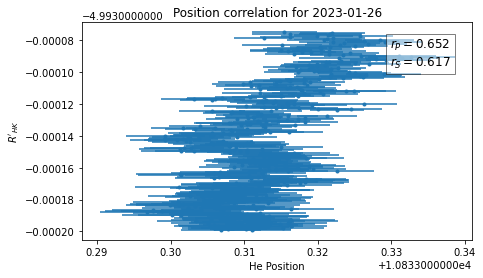

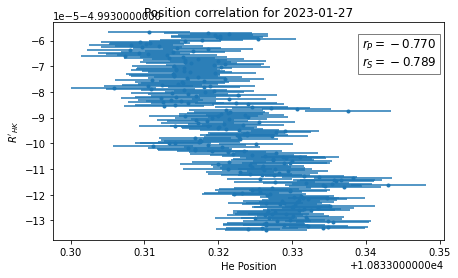

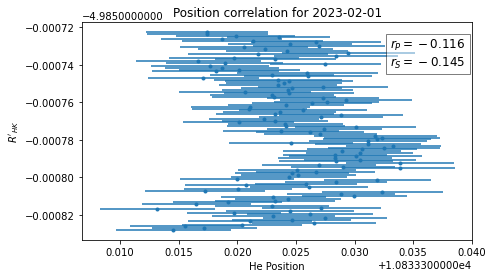

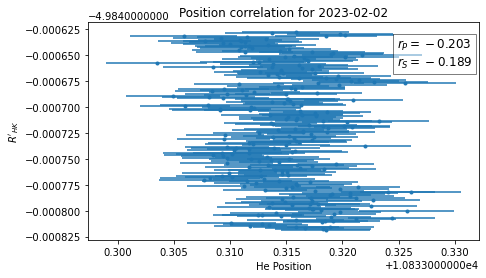

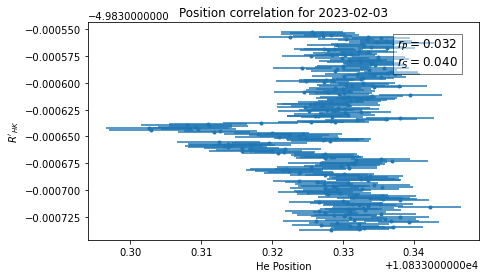

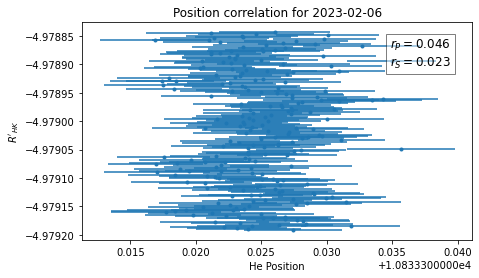

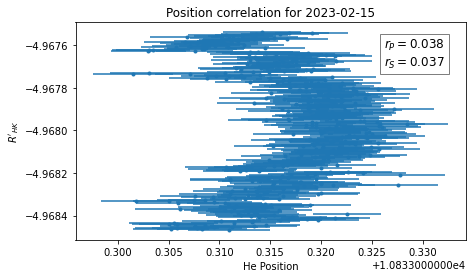

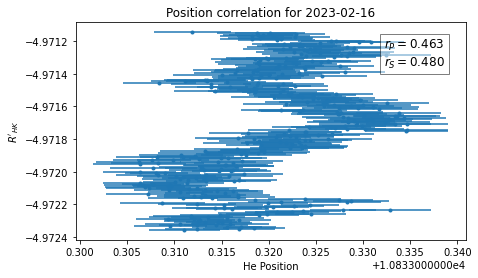

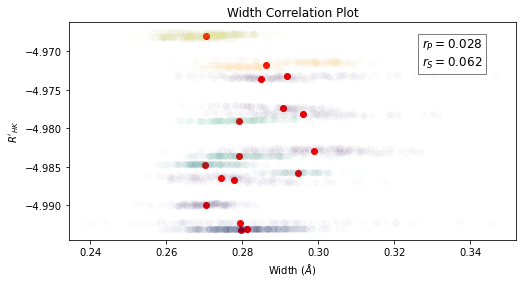

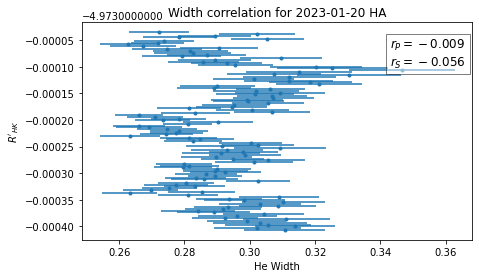

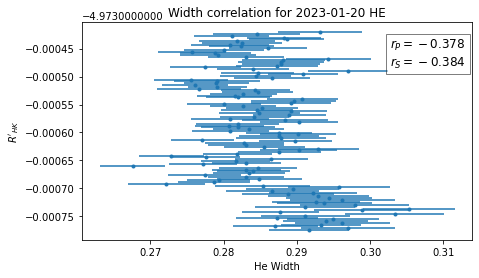

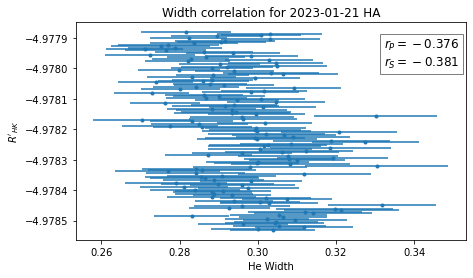

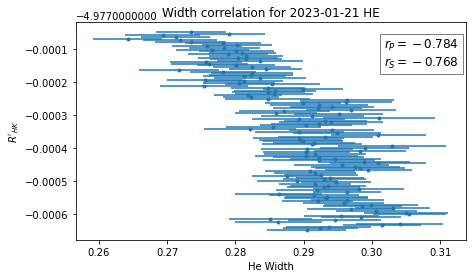

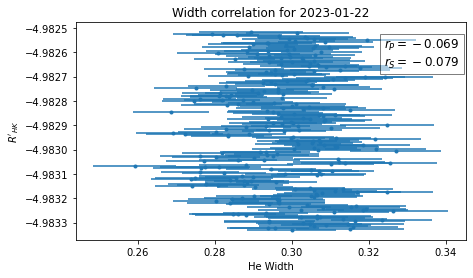

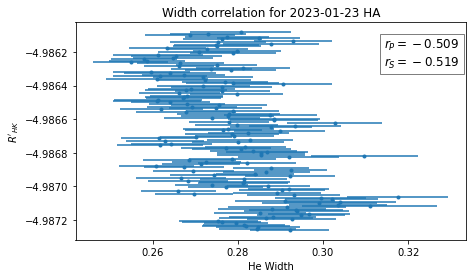

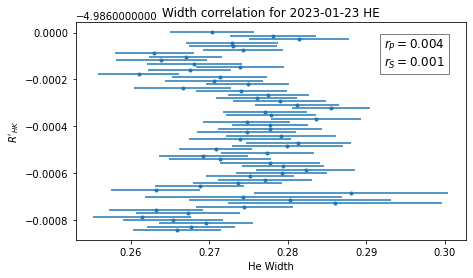

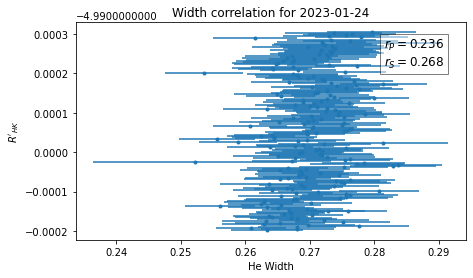

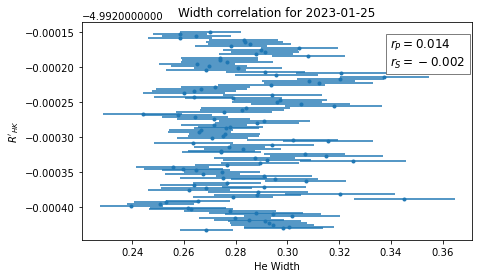

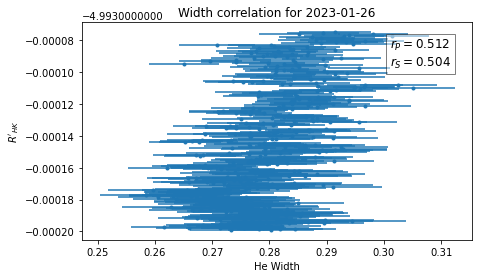

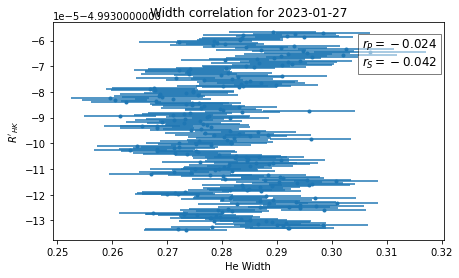

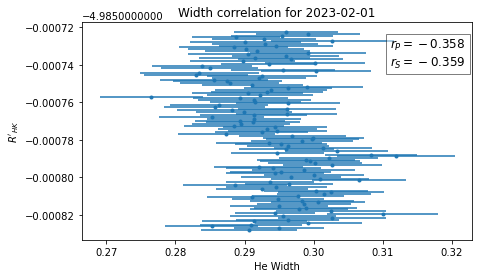

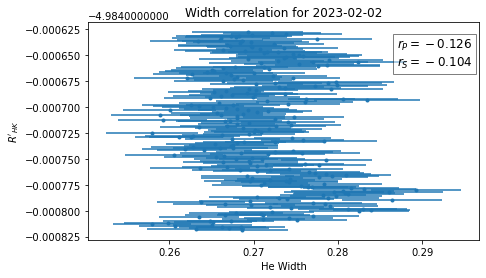

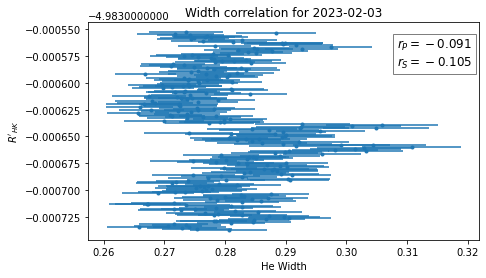

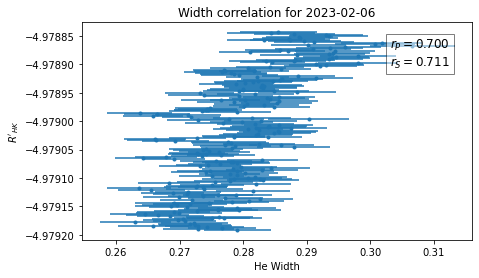

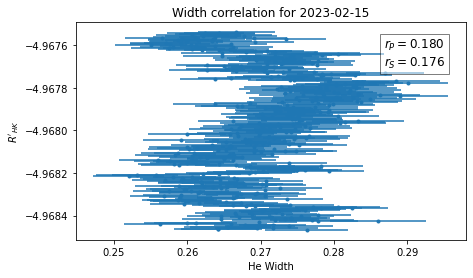

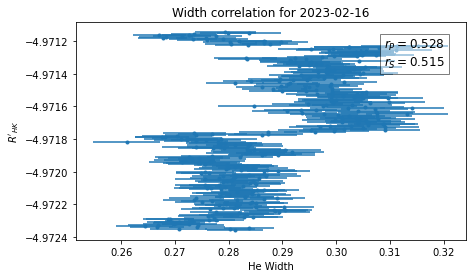

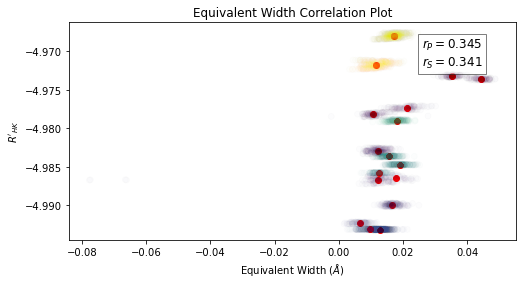

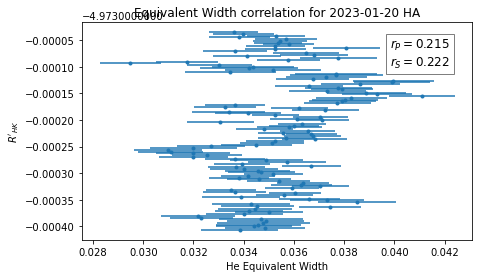

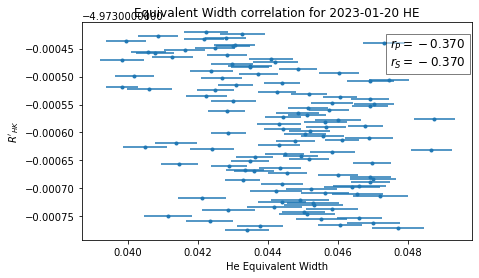

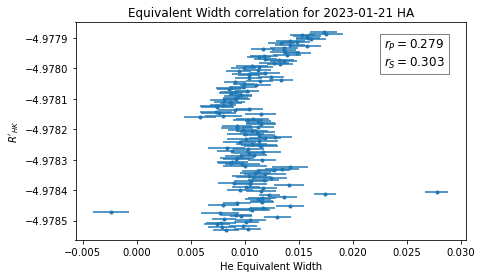

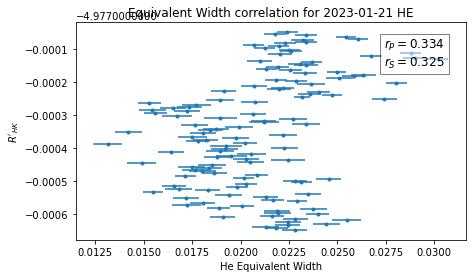

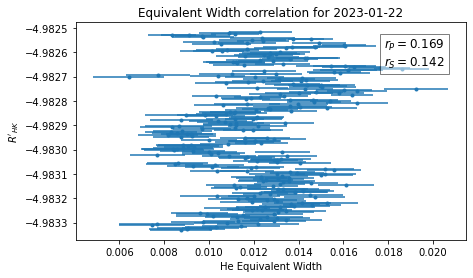

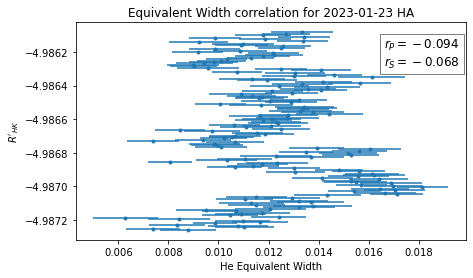

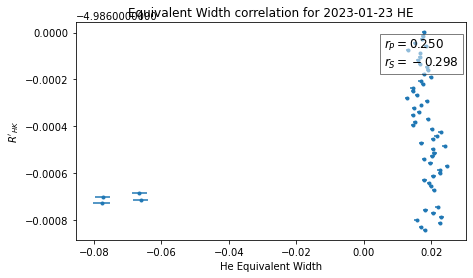

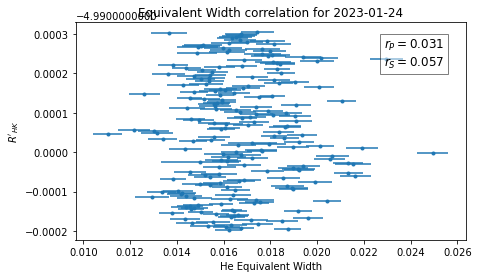

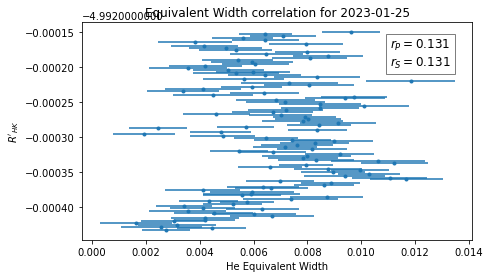

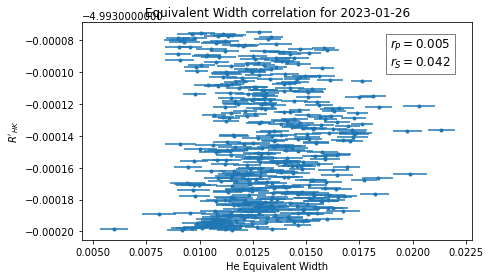

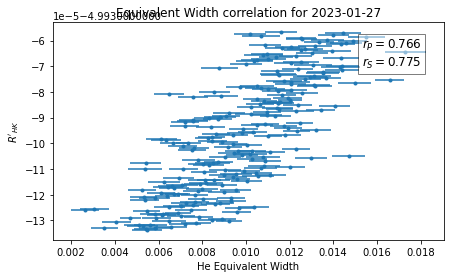

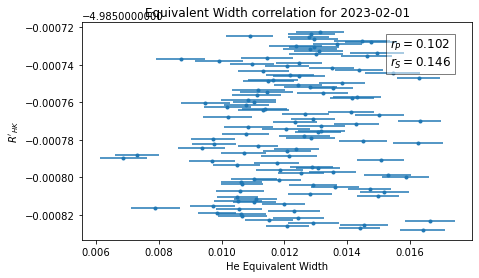

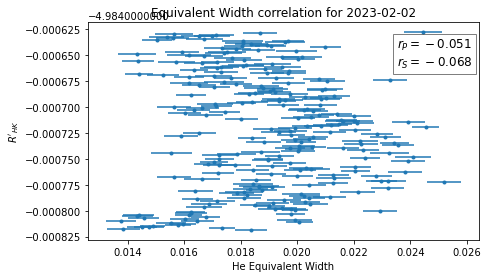

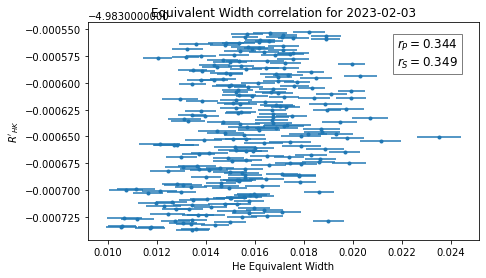

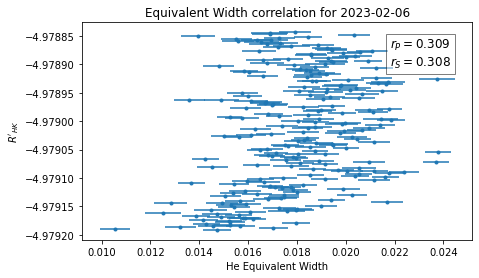

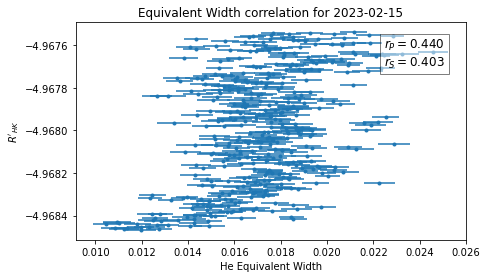

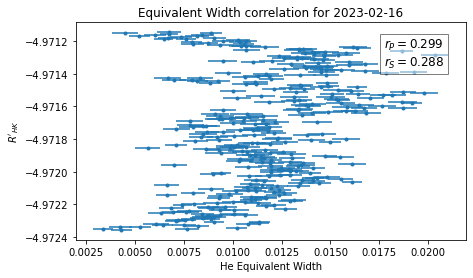

In [66]:
reload(AF)

#Loop over the parameters of interest
for i in range(len(params_of_interest)):
    long_param = []
    long_param_err = []
    long_time = []
    long_model = []

    fig, ax = plt.subplots(1, figsize=[8, 4])
    # Loop over the keys and values in the fit_params_dict dictionary
    for day in param_dictionnary:
        #if day != '2023-01-27' and day!='2023-01-25'and day!='2023-01-26':
        key_list = list(param_dictionnary.keys())

        index = key_list.index(day)
        param_list = np.array([param[indexes_of_interest[i]] for param in param_dictionnary[day]])
        err_list = np.array([err[indexes_of_interest[i]] for err in err_dictionnary[day]])
        time_list = [time for time in time_dictionnary[day]]

        mod_time = np.linspace(time_list[0], time_list[-1], len(time_list))
        model_data = big_model(mod_time, *best_fit_theta)

        #Plotting individual correlation plots
        AF.Correlation_Plot([], param_list, model_data, err_list, [], 'He '+params_of_interest[i], '$R\'_{HK}$', params_of_interest[i], day)

        #Plotting a general correlation plot
        if params_of_interest[i]=='Position':
            ax.scatter(np.median((param_list-ref_wav)*3e8/ref_wav), np.median(model_data), c='red', norm=mc.Normalize(59964.64296989, 59991.87841389))
            ax.scatter((param_list-ref_wav)*3e8/ref_wav, model_data, c=time_list, norm=mc.Normalize(59964.64296989, 59991.87841389), alpha=0.01)
        else:
            ax.scatter(np.median(param_list), np.median(model_data), c='red', norm=mc.Normalize(59964.64296989, 59991.87841389))
            ax.scatter(param_list, model_data, c=time_list, norm=mc.Normalize(59964.64296989, 59991.87841389), alpha=0.01)
        ax.set_xlabel(params_of_interest[i]+' '+units_of_interest[i])
        ax.set_ylabel('$R\'_{HK}$')
        ax.set_title(params_of_interest[i]+' Correlation Plot')

        long_param.append(param_list)
        long_param_err.append(err_list)
        long_time.append(time_list)
        long_model.append(model_data)

    long_param = np.array(list(itertools.chain.from_iterable(long_param)))
    long_param_err = np.array(list(itertools.chain.from_iterable(long_param_err)))
    long_time = np.array(list(itertools.chain.from_iterable(long_time)))
    long_model = np.array(list(itertools.chain.from_iterable(long_model)))

    textstr = '\n'.join((r"$r_P = %.3f$" % (np.corrcoef(long_param, long_model)[0][1], ), 
                            r"$r_S = %.3f$" % (ss.spearmanr(long_param, long_model).correlation, )))
    ax.text(0.79, 0.80, textstr, transform=ax.transAxes, fontsize=12, bbox = dict(facecolor='white', alpha=0.5))
    plt.show()
#AF.Correlation_Plot([], )

[17.23, 22.46, -64.2, 3.2]
[-13.88828778  -6.08830799  14.29965609   2.1980089 ]


100%|██████████████████████████████████████| 8000/8000 [00:22<00:00, 353.81it/s]


True parameter value for Amplitude1: 17.23
Mean of Amplitude1: -10.766477385685736
Median of Amplitude1: -24.560854372974187


True parameter value for Amplitude1: 22.46
Mean of Amplitude1: -63.09146714416127
Median of Amplitude1: -63.09100041052638


True parameter value for Period: -64.2
Mean of Period: 9.99980578641747
Median of Period: 9.999864299446461


True parameter value for Offset: 3.2
Mean of Offset: -1.4046832090372872
Median of Offset: -3.210488829140065




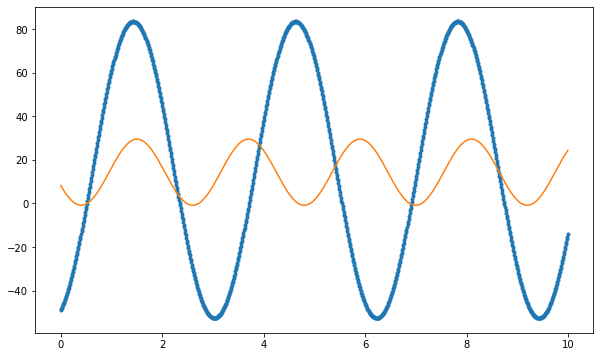

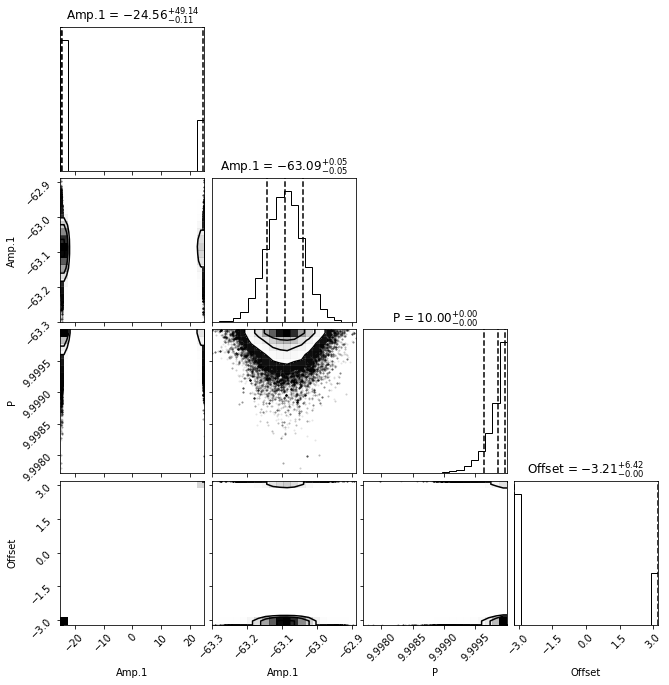

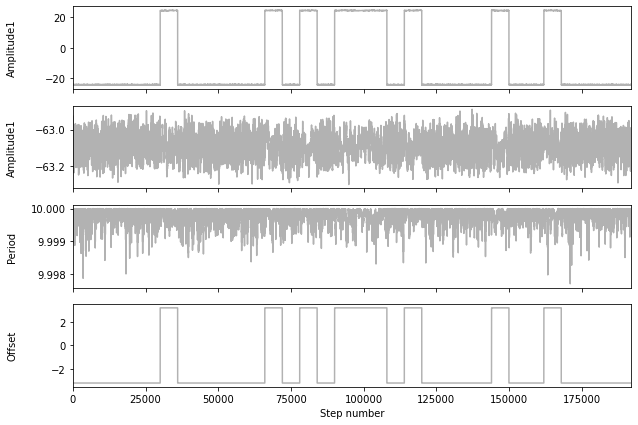

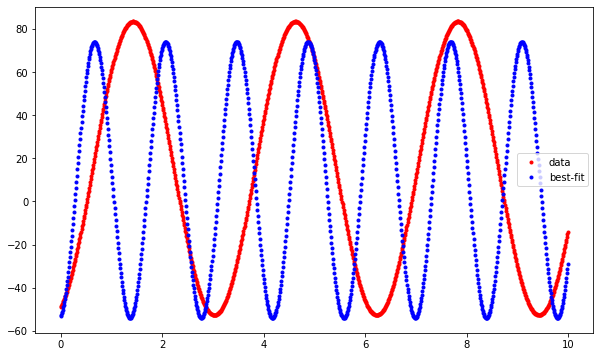

In [108]:
reload(AF)

test_time = np.linspace(0, 10, 1000)

test_sinusoid = 17.23 + 22.46*np.sin(2*np.pi*test_time/3.2) - 64.2*np.cos(2*np.pi*test_time/3.2) + 5*np.random.randn()

true = [17.23, 22.46, -64.2, 3.2]

plt.figure(figsize=[10, 6])
plt.plot(test_time, test_sinusoid, '.')

#Curve_fit
guess = [15, 20, -40, 2]

bestfit1, bestfit2 = curve_fit(AF.sinusoid, test_time, test_sinusoid, p0=guess)

plt.plot(test_time, AF.sinusoid(test_time, *bestfit1))

print(true)
print(bestfit1)

#MCMC 
# Define the log-likelihood function
def log_likelihood(parameters, t, y):
    model_predictions = AF.sinusoid(t, *parameters)
    residuals = y - model_predictions
    chi_squared = np.sum(residuals**2)
    log_likelihood = -0.5 * chi_squared
    return log_likelihood

# Define the log-prior function
def log_prior(parameters):
    # Uniform priors on all parameters
    amplitude1, amplitude2, period, offset = parameters
    if -100 < amplitude1 < 100 and -100 < amplitude2 < 100 and 0 < period < 10 and -100 < offset < 100:
        return 0.0
    return -np.inf

# Define the log-posterior function
def log_posterior(parameters, t, y):
    lp = log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(parameters, t, y)

# Set up the MCMC sampler
nwalkers = 32
ndim = 4
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(test_time, test_sinusoid))

# Initialize the walkers
p0 =np.random.rand(nwalkers, ndim)

# Run the MCMC sampler
nsteps = 8000
sampler.run_mcmc(p0, nsteps, progress=True)

# Extract the chain and discard burn-in samples
burnin = int(nsteps/4)

samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))

#Presenting results
labels = ["Amplitude1", "Amplitude1", "Period", "Offset"]
for i in range(ndim):
    print('True parameter value for '+labels[i]+': '+str(true[i]))
    print('Mean of '+labels[i]+': '+str(np.mean(samples[:, i])))
    print('Median of '+labels[i]+': '+str(np.median(samples[:, i])))
    print('\n')

#Plotting the corner plot
corner.corner(samples, labels=['Amp.1', 'Amp.1', 'P', 'Offset'], 
              quantiles=[0.16, 0.5, 0.84], show_titles=True)

# Plot the posterior samples
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("Step number")

plt.show()

#Plotting best results
best = [np.mean(samples[:, 0]), np.mean(samples[:, 1]), np.mean(samples[:, 2]), np.mean(samples[:, 3])]
plt.figure(figsize=[10, 6])
plt.plot(test_time, test_sinusoid, 'r.', label='data')
plt.plot(test_time, AF.sinusoid(test_time, *best), 'b.', label='best-fit')
plt.legend()
plt.show()

## Curve fit fitting - Discard later

In [ ]:
    #Curve fit
    guess = [-0.0003, 0.0005, np.median(long_param), important_freq[0]**(-1)]
    best_fit_theta, best_fit_err = curve_fit(AF.sinusoid, long_time, long_param, sigma = long_param_err, p0=guess, maxfev=1000000)
    
    #Evaluating the model
    simulated_time = np.linspace(long_time[0], long_time[-1], 10000)
    model = AF.sinusoid(simulated_time, *best_fit_theta)

    #Evaluating the goodness of fit - chi-squared
    residuals = long_param - AF.sinusoid(long_time, *best_fit_theta)
    chisq = np.sum((residuals/long_param_err)**2)
    Dof = len(long_param) - len(best_fit_theta)
    print('chisq='+str(chisq), ' with '+str(Dof)+' degrees of freedom')

    #Evaluating the statistical significance of our results
    print('For ', params_of_interest[i])
    param_name = ['Amplitude Cos', 'Amplitude Sin', 'Offset', 'Period']
    AF.eval_stat(best_fit_theta, long_time, long_param, AF.sinusoid, param_name)
